<a href="https://colab.research.google.com/github/joyjitroy/Machine_Learning/blob/Machine_Learning/Supervised_Learning/Classification/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
#!pip install uszipcode
#!pip install sqlalchemey_mate
#!pip install --upgrade sqlalchemy_mate==2.0.0.0 uszipcode

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Import Libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter  # Import FuncFormatter
import seaborn as sns

# Import Library to display data in Table format
from tabulate import tabulate

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Import Library to split data
# Import Library to tune different models
from sklearn.model_selection import train_test_split, GridSearchCV

# Import Library to build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree

# Import Library to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix,
    make_scorer,
)

# Import Library to provide informative messages to users without interrupting the flow of the program
# Warnings are typically used to alert users of potential problems,
# such as deprecated features or unexpected runtime conditions
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [ ]:
# Mount google drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the Data from excel into a dataset
folder = '/content/drive/MyDrive/AI_ML/Projects/Machine Learning/'
file = 'Loan_Modelling.csv'
df = pd.read_csv(folder + file)

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

## Data Overview

* Observations
* Sanity checks

### View the first and last 5 rows of the dataset

In [ ]:
# returns the first 5 rows from dataset
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# returns the last 5 rows from dataset
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Understand the shape of the dataset

In [ ]:
# Check the number of rows and columns in the Dataset Shape
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 5000 rows and 14 columns.


In [ ]:
# Print a concise summary of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* **Observations**:
 - The Dataframe has 5000 Rows and 14 Columns
 - out of 14 datatype of only one column (CCAvg) is an Integer column. The datatype of the remaining 13 columns is Float.

### Sanity Check of the Data

In [ ]:
# Check presence of missing, NaN or negative value in the dataset
pd.DataFrame({
    'Missing_Counts': data.isnull().sum(),  # Check for missing values in the Dataset
    'NaN_Counts': data.isna().sum(),        # Check for NaN (Not an Number) values in the Dataset
    'Has_Negative': (data < 0).any(),       # Check for negative values in the Dataset
})

Missing_Counts  NaN_Counts  Has_Negative
ID                               0           0         False
Age                              0           0         False
Experience                       0           0          True
Income                           0           0         False
ZIPCode                          0           0         False
Family                           0           0         False
CCAvg                            0           0         False
Education                        0           0         False
Mortgage                         0           0         False
Personal_Loan                    0           0         False
Securities_Account               0           0         False
CD_Account                       0           0         False
Online                           0           0         False
CreditCard                       0           0         False

In [ ]:
# Check for duplicate values in the Dataset
data.duplicated().sum() # aggregating the duplicate values of a dataset

0

**Observation**:
 - The dataset has no Missing, NaN (Not a Number) Value.
 - The Dataset has no duplicates value as well.
 - The experience column has Negative number.

### Statistical summary

In [ ]:
# Print statistical summary of the data using describe() method
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

## Data preprosessing before EDA

### Dropping Columns

* The `ID` column contains only unique values, so we can drop it

In [ ]:
# Drop the ID Column
try:
  data = data.drop(['ID'], axis=1)
  print("ID column dropped successfully.")
except KeyError:
  print(f"Column ID must already be dropped.")

ID column dropped successfully.


### Checking for Anomalous Values

In [ ]:
# Given that the 'Experience' field has negative numbers, it's important to verify the uniqueness of the values
# Use the unique() method to examine all unique values in the 'Experience' field and identify potential anomalies
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

**Observation**: There are three negative numbers, specifically -1, -2, and -3, in 'Experience' field

In [ ]:
# Additionally, it is necessary to determine the number of customers impacted by the incorrect value
# Utilize the loc[] function to locate entries in the Experience field with negative values
# Apply the value_counts() method to determine the frequency of each negative value

data.loc[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

**Observation**: We've identified a total of 52 customers with negative professional experience, distributed among the values -1, -2, and -3. It seems that these values mistakenly include a minus sign, and should be replaced by its absolute value

In [ ]:
# Correcting the experience values by replacing the negative value with its absolute value
# use abs() function to get the absolute value. apply lamda function
data['Experience'] = data['Experience'].apply(lambda val: np.abs(val) if val < 0 else val)

In [ ]:
# Reconfirm if any negative value exist
print("No negative values exist in the Experience column:", not data.loc[data['Experience'] < 0]['Experience'].value_counts().empty)

No negative values exist in the Experience column: False


### Feature Engineering

#### Replace the Zip Code by corresponding County

In [ ]:
# Check the Statical Summary of zip code
data["ZIPCode"].describe()

count     5000.000000
mean     93169.257000
std       1759.455086
min      90005.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIPCode, dtype: float64

**Observation**: There are 467 unique ZIP codes in the dataset. Due to the **high cardinality** of ZIP code data, which can lead to **overfitting**, it's crucial to apply feature engineering techniques. Here, we use the uszipcode library to define a function that retrieves the county corresponding to a given ZIP code. This feature engineering technique will perform the following two actions:

1.   **Dimensionality Reduction**: ZIP codes may be high-dimensional and lead to overfitting. Replacing the ZIP code with the county helps reduce dimensionality while retaining significant geographical details.
3. **Interpretability Enhancement**: Decision tree models offer inherent interpretability. Converting the ZIP code to the county as a feature enhances model understandability and facilitates easier interpretation of how regional aspects influence model predictions.


In [ ]:
# library required to convert zipcode to county
from uszipcode import SearchEngine

# User defined function to find the County by Zip code
def zipcode_to_county(zipc):
  search = SearchEngine()       # Initialize the search engine
  try:
    zipcode = search.by_zipcode(zipc) # Search for the ZIP code
    return (zipcode.county).strip()   # Return the county name
  except:
    return "Unknown"                  # Return "Unknown"if no County found

In [ ]:
# Ad a new 'County' Column to store the County against Zip Code
data["County"] = data["ZIPCode"].apply(zipcode_to_county)

In [ ]:
# Check the number of unique County Code
print("Total", data["County"].nunique(), "unique County Code identified")
print("_"*40)
# Utilize the value_counts() function to check how many Distinct County identified and number of Zip Code under each County
data.County.value_counts()

Total 39 unique County Code identified
________________________________________


Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Unknown                     34
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

**Observation**:
 - A total of 39 unique counties have been identified, with the majority of customers residing in Los Angeles County.
 - The county information for 34 customers is unknown, which is acceptable given the overall customer volume.
 -  Using the county instead of the ZIP code will help avoid overfitting the model.

In [ ]:
# Check the data after Feature Engineering
data.sample(5)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
3017   57          32      68    90041       2    3.7          1       184   
116    54          29      35    92831       1    1.5          2         0   
3953   50          26      52    93555       4    0.1          3         0   
3712   50          25     112    92154       1    0.6          1         0   
1849   50          26      42    90630       1    1.6          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
3017              0                   0           0       0           0   
116               0                   0           0       1           0   
3953              0                   0           0       0           0   
3712              0                   0           0       0           0   
1849              0                   0           0       1           0   

                  County  
3017  Los Angeles County  
116        Orange County  
3953         Kern County  
3712    San Diego County  
1849       Orange County

## Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Answer**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
- **Ans**: The distribution of home mortgage amounts is heavily concentrated around $0, indicating that the majority of customers (approximately 3500 out of 5000) have not taken out a home loan.
The Boxplot depicting mortgage amounts also reveals numerous outliers in the upper quartiles, suggesting that a few customers have taken exceptionally high home mortgages.

2. How many customers have credit cards?
- **Ans**: There are two attributes related to credit cards:

 - <u>CCAvg</u>: Average spending on credit cards per month (in thousand dollars).
 - <u>CreditCard</u>: Indicates whether the customer uses a credit card issued by any other bank (excluding All Life Bank) (0: No, 1: Yes).

>>The question doesn't specify which attribute is being referred to.

>>Based on the analysis of the "CCAvg" attribute, it is assumed that 4898 customers hold a credit card, with the condition that zero spending equates to not holding a credit card.

>>Regarding the analysis of the "CreditCard" attribute, it indicates that out of 5000 customers, 1470 hold credit cards from other banks.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
- **Ans**: The Income attributes shows strong positive correlation with credit card spending and personal loan amount. Higher income is associated with higher credit card spending and a greater tendency to take out personal loans.

4. How does a customer's interest in purchasing a loan vary with their age?
- **Ans**: The age distribution among customers with Personal Loans and without Personal Loans is similar, indicating that interest in Personal Loans is not significantly influenced by age.

5. How does a customer's interest in purchasing a loan vary with their education?
- **Ans**: Customers with higher education levels tend to opt for more Personal Loans, likely due to their higher incomes.

### Define useful functions for improved graphical representations

#### Render a Boxplot and histogram combined

In [ ]:
def histogram_boxplot(data, feature,
                      Title = None,
                      xlabel = None,
                      figsize = (12, 7), fontsize = 15,
                      kde = False,
                      bins = None,
                      boxPlot_Color = None,
                      histPlot_Color = None,
                      hist_palette = "winter",
                      ):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows = 2,          # Number of rows of the subplot grid= 2
        sharex = True,      # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize)

    # Create boxplot with mean indicator, and histogram with mean and median lines
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot( data = data, x = feature, ax = ax_box, showmeans = True, color = boxPlot_Color)  # For Boxplot
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist, bins = bins, color = histPlot_Color, palette = hist_palette
    ) if bins else sns.histplot(
        data = data, x = feature, color = histPlot_Color, kde = kde, ax = ax_hist
        )  # For histogram

    ax_hist.axvline(data[feature].mean(), color = "black", linestyle="--")   # Add mean to the histogram
    ax_hist.axvline(data[feature].median(), color = "black", linestyle="-")  # Add median to the histogram
    ax_hist.legend(['Mean', 'Median'])                                       # Add a legend with Mean and Modian

    # Set the Title of the Plot
    # If Title is Not Specified, then create the Title
    # Lambda Function Utilized
    Title = (("Distribution of " + feature) if Title is None else (Title)).replace("_", " ")

    # Assign a Suitable Title to the Plot
    fig.suptitle(Title, fontsize = fontsize, y = 0.95)

    # Set the label of the x column
    ax_hist.set_xlabel(((feature) if xlabel is None else (xlabel)).replace("_", " "),
               fontsize = fontsize)

    plt.show()  # show the plot

#### Render a labeled Barplot

In [ ]:
# function to create labeled barplots
def labeled_barplot(data,             # dataframe
                    feature,          # dataframe column name
                    mapping = {},     # if column represent binary value then map to the actual value
                    perc = False,     # whether to display percentages instead of count (default is False)
                    n = None,         # displays the top n category levels (default is None, i.e., display all levels)
                    Title = None,
                    xlabel = None,
                    palette = "Paired",
                    fontsize = 12, degree = 0):

    total = len(data[feature])      # length of the column
    count = data[feature].nunique() # number of unique values

    # Set the Plot size
    plt.figure(figsize = (count + 1, 5)) if n is None else plt.figure(figsize = (n + 1, 5))

    # Generate the Plot
    ax = sns.countplot(data = data, x = feature, palette = palette,
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    # Set the Label for each bin of the barplot
    for p in ax.patches:
      # Set the Label
      label = "{:.1f}%".format(100 * p.get_height() / total) if perc else p.get_height()

      # Get the x and y position of the label
      x = p.get_x() + p.get_width() / 2   # width of the plot
      y = p.get_height()                  # height of the plot

      # Annotate the Labels
      ax.annotate(label, (x, y), ha = "center", va = "center",
            size = fontsize, xytext = (0, 5), textcoords="offset points",
      )  # annotate the percentage

    # Render the barplot
    plot_styling(data, feature, mapping,
                 Title, "Barplot of ",
                 xlabel, degree = degree,
                 )

    sns.despine(left=True)    # Hide the plot border
    plt.show()                # show the plot

#### Render a Stacked Barplot

In [ ]:
# Render a interactive bar chart for Bivariate analysis
def stacked_barplot(data,
                    predictor,              # independent variable
                    target,                 # target variable
                    Title = None,           # Title of the plot
                    xlabel = None,          # x-axis label
                    index_mapping = {},
                    column_mapping = {},
                    kind = 'bar', stacked = True,
                    fontsize = 12, degree = 0,
                    normatized_by_index = True,
                    figsize_height = 5,
                    linewidth = 0.5,
                    ):

    # Define useful variables
    count = data[predictor].nunique()               # Return the unique value count of predictor column
    predictor_ = (predictor).replace("_", " ") if xlabel is None else (xlabel)
                                                    # set the label of X axis
    target_ = target.replace("_", " ")              # set the label of Legand

    # Create Plot data by creating a Crosstab with predictor and target column
    plotdata = pd.crosstab(data[predictor], data[target], normalize = "index"
                           ) if normatized_by_index else pd.crosstab(data[predictor], data[target]
                                                                  ).sort_values(by=data[target].value_counts().index[1], ascending=False)

    # Replace index and column values using the rename method
    plotdata.rename(index = index_mapping, columns = column_mapping, inplace=True)

    # Plot the data
    plotdata.plot(kind = kind, stacked = stacked, figsize=(count + 5, figsize_height), width = linewidth)

    # If Title is Not Specified, then define the Title
    Title = (predictor_ + " v/s " + target_) if Title is None else (Title)

    plt.title(Title, fontsize = fontsize, y=1.04)                       # Display the Title of the Plot
    plt.xlabel(predictor_, fontsize = fontsize)                         # Display the plot accross X Axis
    plt.xticks(rotation = degree, fontsize = fontsize)                  # Display labels of xticks
    plt.yticks(fontsize = fontsize)                                     # Display labels of xticks
    plt.legend(title = target_, loc="upper left", bbox_to_anchor=(1, 1)) # display the Legand

    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage)) if normatized_by_index else None  # Format the y-axis

    sns.despine(top = True, right = True)       # Hide the plot border
    plt.show()                                  # Display the Plot

#### Render a distributions plot and Box plot

In [ ]:
### function to plot distributions with restpect to target

def distribution_plot_wrt_target(data, predictor, target,
                                  Title = None,
                                  xlabel = None,
                                  mapping = None,
                                  ked = False,
                                  hist_stat = "density",
                                  Color = ["teal", "orange"],
                                  figsize=(12, 10),
                                  fontsize = 12, degree = 0,
                                 ):

    # Set up labels text
    predictor_ = (predictor).replace("_", " ") if xlabel is None else (xlabel)
    target_ = target.replace("_", " ")

    # Get all the unique value of Target variable
    target_uniq = sorted(data[target].unique())

    # Map each unique numeric target to its corresponding non-numeric value
    target_val = [mapping.get(item, item) for item in (target_uniq)] if mapping != None else target_uniq

    # Define a 2x2 Subplot
    fig, axs = plt.subplots(2, len(target_uniq), figsize = figsize)

    # Add space between Subplots
    fig.subplots_adjust(hspace=0.3)

    # Render the Histplots
    for i in range(len(target_uniq)):
      # Set title for Histplots
      axs[0, i].set_title("Distribution of " + predictor_ +
                          " when " + target_ + " = " + str(target_val[i]))

      # Plot the Histograms
      sns.histplot(data = data[data[target] == target_uniq[i]],
                x=predictor, kde=ked, ax=axs[0, i], color= Color[i], stat = hist_stat)

      # Set the Lavel of X Axis by replacing Underscores in the Column Name with Spaces
      axs[0, i].set_xlabel(predictor_, fontsize = fontsize)

    # Render the Boxplots
    for i in range(len(target_uniq)):
      # Set title for Boxplot
      axs[1, i].set_title("Boxplot of " + predictor_ +
                          " w.r.t. " + target_ + " = " + str(target_val[i]))

      # plot the Bixplots
      sns.boxplot(data = data[data[target] == target_uniq[i]], x = predictor,
                  ax=axs[1, i], color = Color[i])

      # Set the Lavel of X Axis by replacing Underscores in the Column Name with Spaces
      axs[1, i].set_xlabel(predictor_, fontsize = fontsize)

    # Set a title for the figure object
    fig.suptitle((target_ + " v/s " + predictor_)if Title is None else (Title),
                 fontsize = fontsize, y=0.95)

    plt.show() # Display the Plot

#### Print a table

In [ ]:
# Fuinction to print a table
def print_table(data, predictor, target,
                index_mapping = {},
                column_mapping = {},
                tablefmt ='fancy_grid',
                ):

    # Define useful variables
    sorter = data[target].value_counts().index[-1]  # Returns the least common value in the target column

    # Creater a Crosstab with predictor and target column
    cross_tab = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter)

    # Replace index and column values using the rename method
    cross_tab.rename(index = index_mapping, columns = column_mapping, inplace=True)

    # Define the new index name by combining the column name and index name
    # Additionally, replace any underscores in the new index name with spaces
    table_index_name = (cross_tab.columns.name + "\n" + cross_tab.index.name).replace("_", " ")

    # Set the name of the axis for the index with new name
    cross_tab.rename_axis(table_index_name, axis='index', inplace = True)

    # Print the table
    print(tabulate(cross_tab, headers='keys', tablefmt = tablefmt))


#### Other useful functions

In [ ]:
def plot_styling (  data,
                    feature,
                    mapping = {},
                    Title = None,
                    Title_prefix = "",
                    xlabel = None,
                    fontsize = 12, degree = 0,
                    ):
    # If Title is Not Specified, Set the Title of the Plot
    Title = Title_prefix + ((feature) if Title is None else (Title)).replace("_", " ")

    # Add the Title to the Plot
    plt.title(Title, fontsize = fontsize, y=1.02)

    # if x Axis label is not specified, then
    # Set the x axis label by replacing Underscores in the Column Name with Spaces
    plt.xlabel(((feature) if xlabel is None else (xlabel)).replace("_", " "),
               fontsize = fontsize)

    # map the xticks label
    labels = [mapping.get(x, x) for x in np.sort(data[feature].unique())]

    # Set the xticks labels
    plt.xticks(tuple(range(0, len(labels))),
               labels = labels,
               rotation = degree, fontsize = fontsize # Rotate the x-Axis Label and set the front side
               )

In [ ]:
# Function to format y-axis as percentage
def to_percentage(y, position):
    return f'{100 * y:.0f}%'

### Univariate Analysis

#### Observation on Age

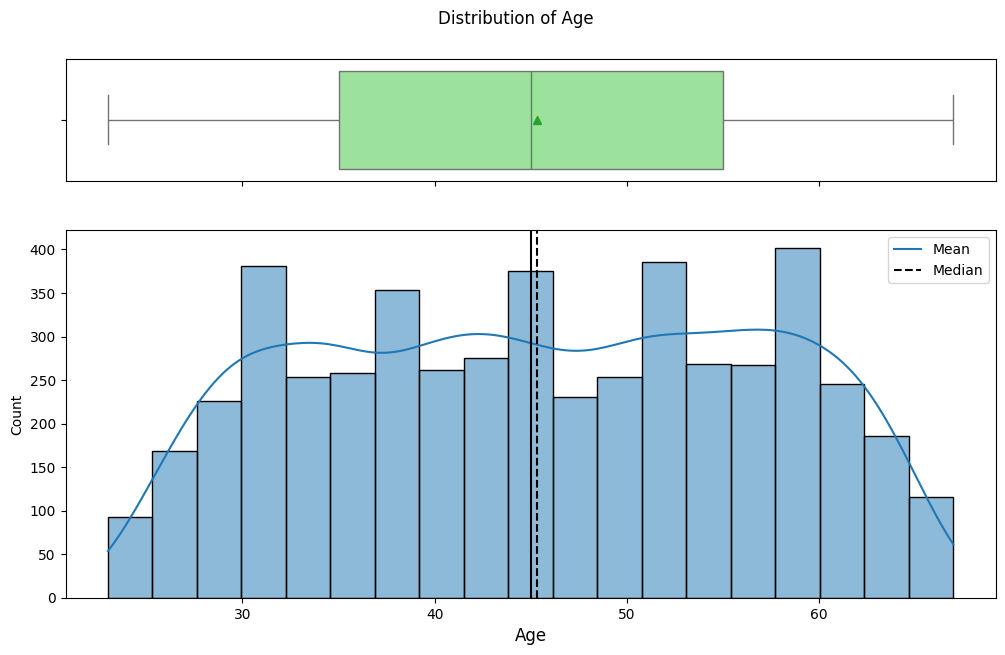

In [ ]:
# Call the Function with Display The Histogram and Boxplot both
histogram_boxplot(data, "Age", fontsize = 12, kde=True, boxPlot_Color = 'lightgreen')

**Observation**:
 - The customer age is uniformly distributed, showing no outliers, with an average Age of around 45 years.
 - The close proximity of the mean and median also suggests a symmetrical distribution.

#### Observations on Experience

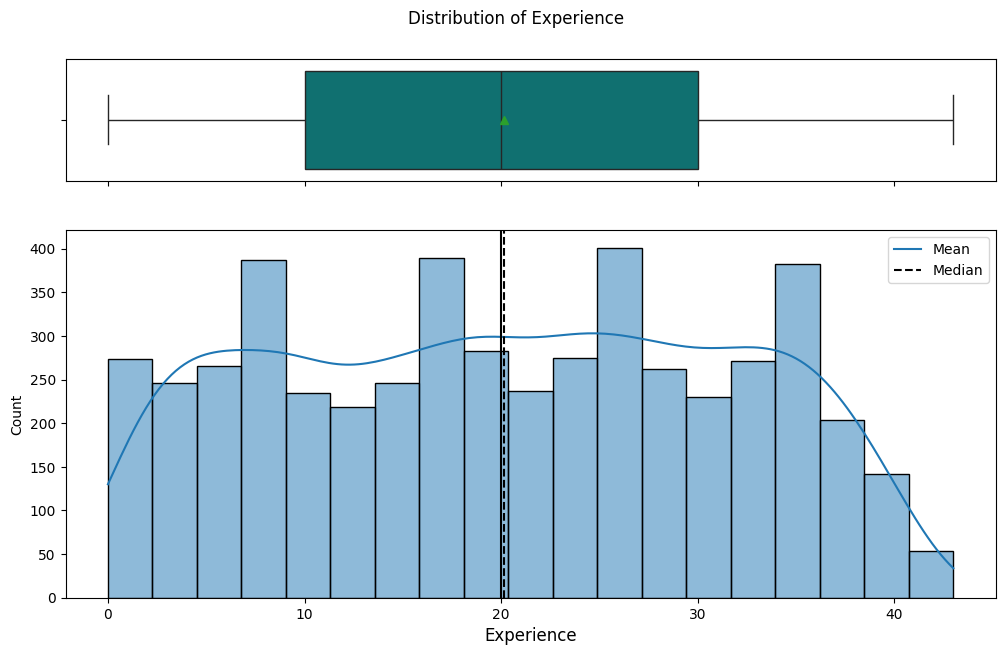

In [ ]:
# Call the Function with Display The Histogram and Boxplot both
histogram_boxplot(data, "Experience", fontsize = 12, kde=True, boxPlot_Color = 'teal')

**Observation**:
 - The professional experience distribution among customers is uniform, with no outliers, and an average Experience close to 20 years.
 - Mean and median are very closed also indicates a symmetrical distribution.

#### Observations on Income

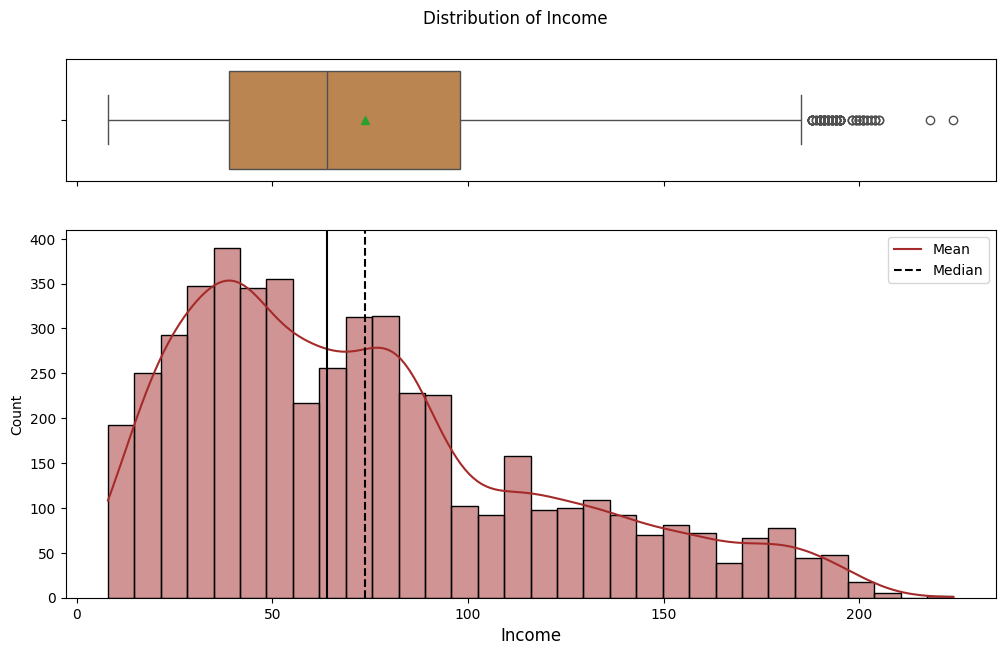

In [ ]:
# Call the Function with Display The Histogram and Boxplot both
histogram_boxplot(data, "Income", fontsize = 12, kde=True, boxPlot_Color = 'peru', histPlot_Color = 'brown')

**Observation**:
 - The income data exhibits right skewness with outliers above the upper whisker.
 - The distribution indicates  there are relatively more customers with lower incomes, and as incomes increase, the number of customers decreases gradually.

#### Observations on Family

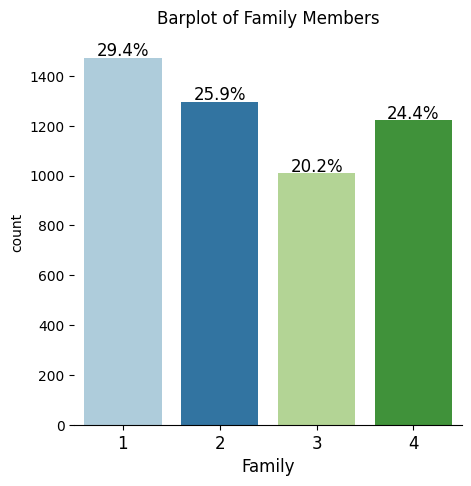

In [ ]:
# Call the Function with Display The labeled barplot
labeled_barplot(data, "Family", perc=True, Title = "Family Members")

**Observation**:
 - The data indicates majority of the customers are from nucelear family.
 - Maximum number of customers (29.4%) are single.

#### Observations on Credit Card Average

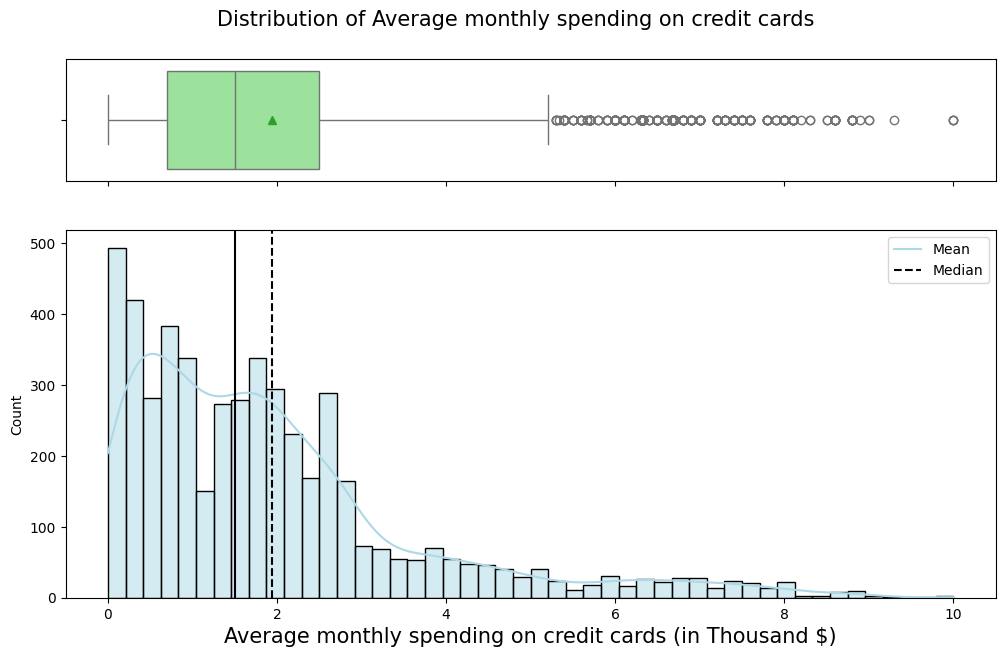

In [ ]:
# Call the Function with Display The Histogram and Boxplot both
histogram_boxplot(data, "CCAvg",
                  xlabel = "Average monthly spending on credit cards (in Thousand $)",
                  Title = "Distribution of Average monthly spending on credit cards",
                  kde=True, boxPlot_Color = 'lightgreen', histPlot_Color = 'lightblue')

In [ ]:
# Check how many customers have no spending on credit card
print('Total', data.loc[data['CCAvg'] == 0]['CCAvg'].count(), 'customers have not spent on credit card')

Total 106 customers have not spent on credit card


**Observation**:
 - Credit card spending shows a right-skewed distribution with many outliers in the upper quartile.
 - There are 106 customers who have zero spending on credit cards. Assuming zero spending implies not holding a credit card, then 4898 customers are considered to hold credit cards. However, it's important to note that holding a credit card doesn't necessarily mean active usage. So, the assumption that 4898 customers hold a credit card is based on the condition that zero spending equates to not holding a credit card.

#### Observations on Education

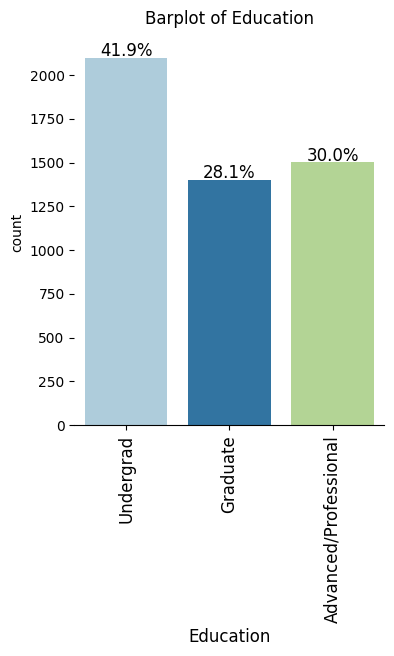

In [ ]:
# Define mapping of numerical values to categorical values
mapping_Education = {1 : 'Undergrad', 2 : 'Graduate', 3 : 'Advanced/Professional'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'Education', mapping = mapping_Education, perc = True, degree = 90 )

**Observation**:
 - Highest percentage 41.9% of customer are Undergrad
 - 30% of customers are Advanced/Professionals, and 28.1% are Graduates

#### Observations on Mortgage

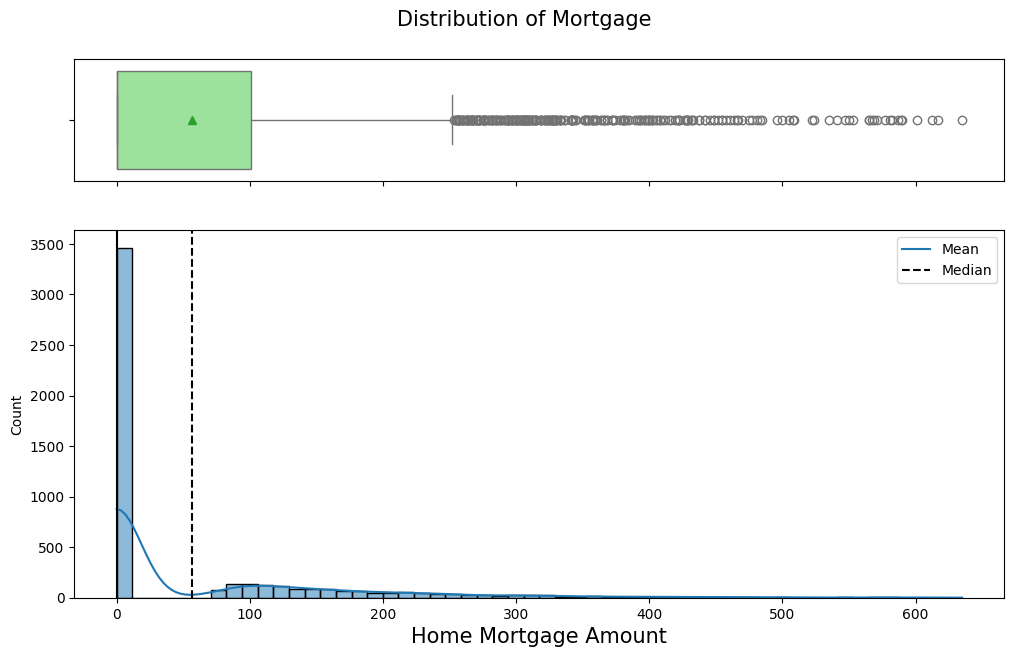

In [ ]:
# Call the Function with Display The Histogram and Boxplot for Mortgage attributes
histogram_boxplot(data, "Mortgage", xlabel = "Home Mortgage Amount",
                  kde=True, boxPlot_Color = 'lightgreen')

**Observation**:
 - The distribution of home mortgage amounts is heavily concentrated around \$0, indicating that the majority of customers (approximately 3500 out of 5000) have not taken out a home loan.
 - The Boxplot depicting mortgage amounts also reveals numerous outliers in the upper quartiles, suggesting that a few customers have taken exceptionally high home mortgages.


 - <u>Note</u>: Tt appears that we need to examine the distribution only for those customers holds a home loan.

In [ ]:
# Chech for how many customers the Mortgage is zero
# those customers has not taken any mortgage from the bank
no_Mortgage = data.loc[data['Mortgage'] == 0]['Mortgage'].count()

# Print the Summary of the Customers have not taken any Mortgage
print('out of', data.shape[0], 'customers,', no_Mortgage, 'customers has not taken any Home Mortgage from the Bank, which is', '{:.2%}'.format(no_Mortgage/data.shape[0]))

out of 5000 customers, 3462 customers has not taken any Home Mortgage from the Bank, which is 69.24%


In [ ]:
# Check the summary of the customers have taken Mortgage
data.loc[data['Mortgage'] != 0]['Mortgage'].describe()

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

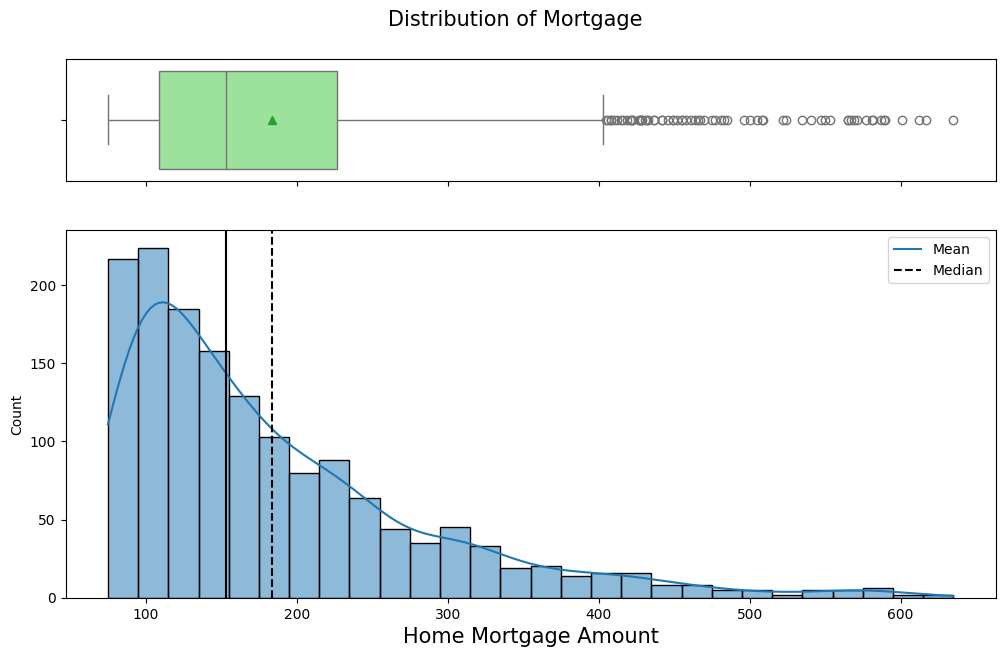

In [ ]:
# Call the Function with Display The Histogram and Boxplot both only for those customers taken Mortgage
histogram_boxplot(data.loc[data['Mortgage'] != 0], "Mortgage", xlabel = "Home Mortgage Amount",
                  kde=True, boxPlot_Color = 'lightgreen')

**Observation**:
 - 69.24% of customers, totaling 3462, have not taken out a home mortgage from the bank.
 - Among customers who did take out home mortgages, the mortgage amount distribution is right-skewed, with numerous outliers in the upper quartile.

#### Observation on Personal Loan

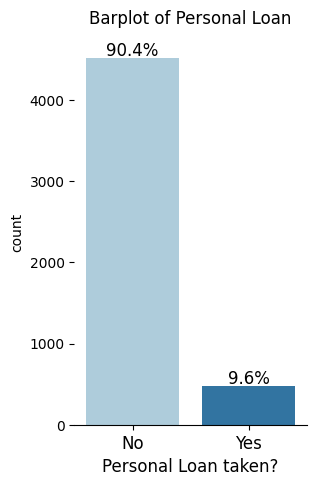

In [ ]:
# Define mapping of numerical values to categorical values
mapping_Personal_Loan = {0 : 'No', 1 : 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'Personal_Loan', perc=True, mapping = mapping_Personal_Loan,
                xlabel = 'Personal Loan taken?', Title = 'Personal Loan')

**Observation**: Only 9.6% of customers have taken a Personal Loan from the Bank in the previous campaign, leaving 90.4% without one

#### Observation on Securities Account

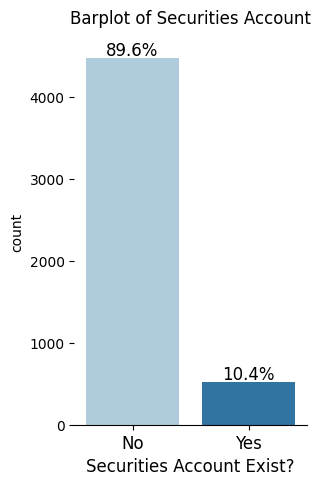

In [ ]:
# Define mapping of numerical values to categorical values
mapping_Securities_Account = {0 : 'No', 1 : 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'Securities_Account', perc=True,
                mapping = mapping_Securities_Account,
                xlabel = "Securities Account Exist?", Title = "Securities Account")

**Observation**: only 10.4% of customers hold Securities Account, remaining 89.6% customers don't

#### Observation on CD Account

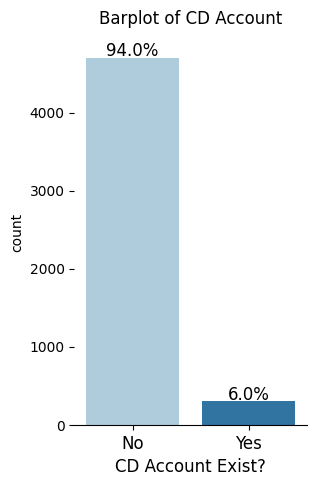

In [ ]:
# Define mapping of numerical values to categorical values
mapping_CD_Account = {0: 'No', 1: 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'CD_Account', perc=True, mapping = mapping_CD_Account,
                Title = "CD Account", xlabel = 'CD Account Exist?')

**Observation**: Only 6% of the customers hold a CD account whereas, 94% of the customers don't

#### Observation on Online Access

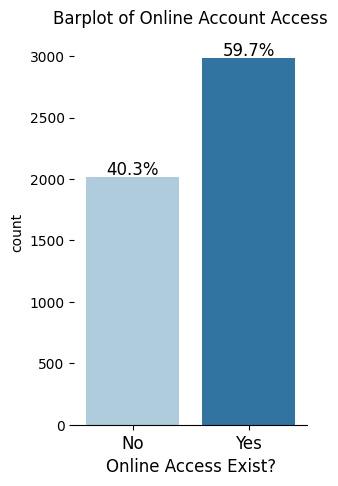

In [ ]:
# Define mapping of numerical values to categorical values
mapping_Online = {0: 'No', 1: 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'Online', perc=True, mapping = mapping_Online,
                Title = 'Online Account Access', xlabel = "Online Access Exist?")

**Observation**: 59.7% of the Bank's customers have online access, remaining 40.3 % customers don't

#### Observation on Credit Card

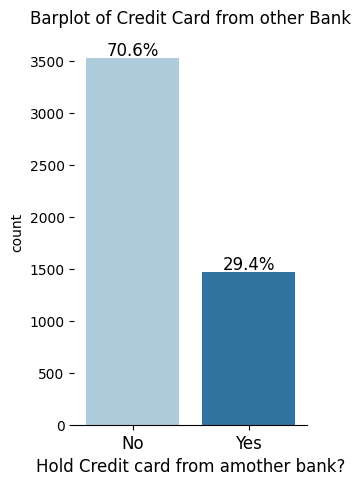

In [ ]:
# Define mapping of numerical values to categorical values
mapping_CreditCard = {0: 'No', 1: 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'CreditCard', mapping = mapping_CreditCard,
                perc=True, Title = 'Credit Card from other Bank',
                xlabel = 'Hold Credit card from amother bank?')

In [ ]:
# Check the exact number of how many customer holds credit card from other bank -
print(data.loc[data['CreditCard'] == 1]['CreditCard'].count(), 'customers out of 5000, holds credit card from other banks')

1470 customers out of 5000, holds credit card from other banks


**Observation**: 1470 (29.4%) out of 5000, hold credit card from other banks, rest of the customers (70.6%) don't

#### Observation on County Code

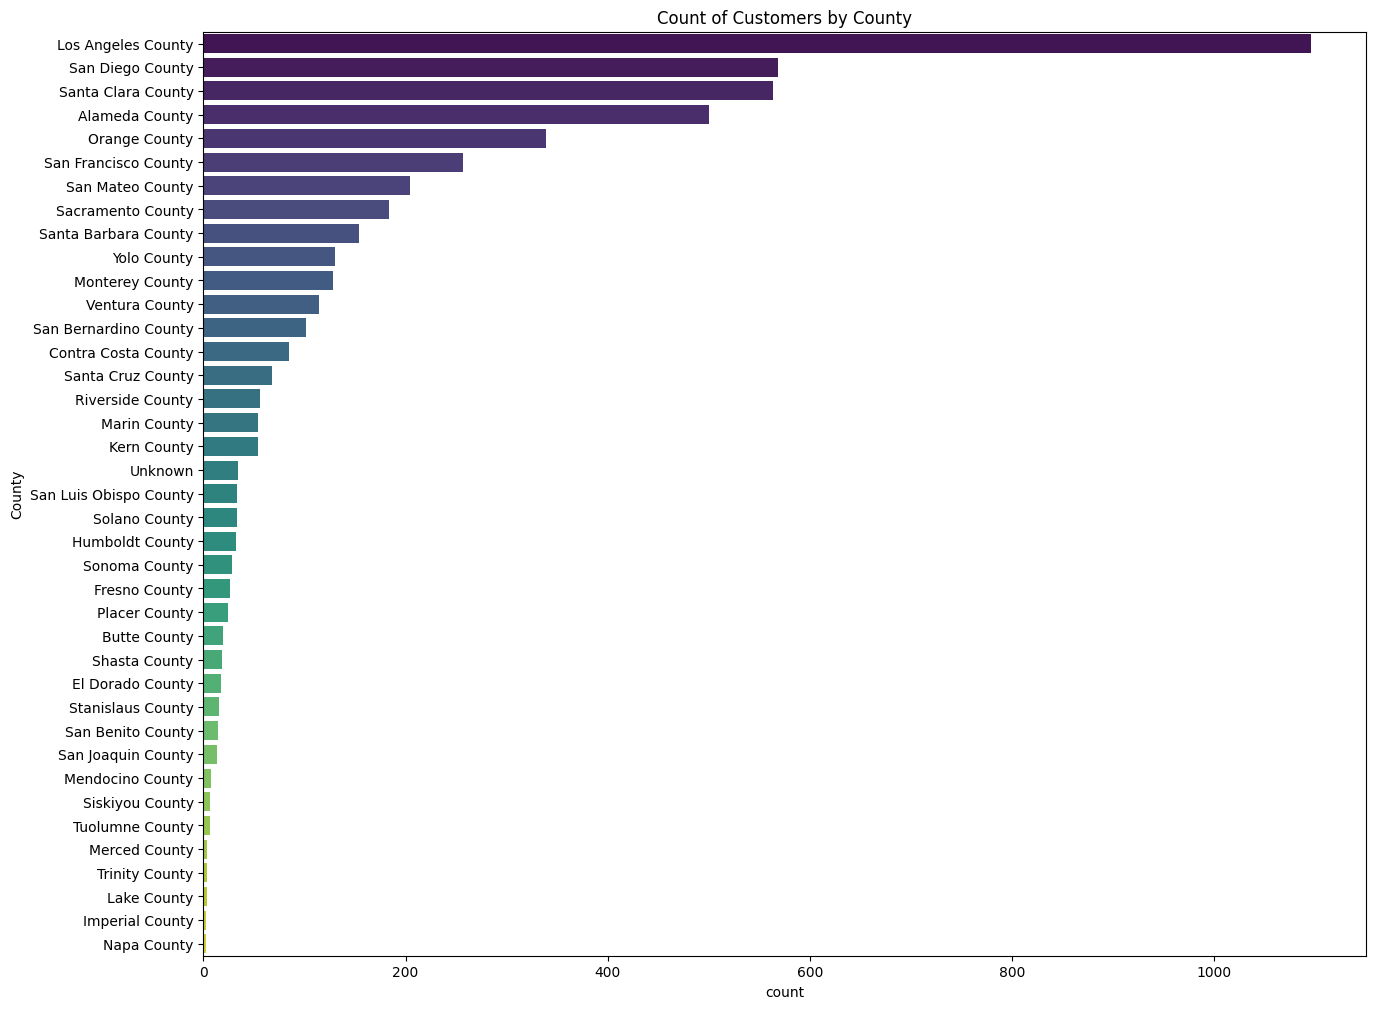

In [ ]:
fig = plt.figure(figsize = (15, 12))

# Sort the counts
county_counts = data["County"].value_counts().sort_values(ascending=False)

# Create a new DataFrame for the sorted counts
sorted_data = data["County"].astype('category').cat.reorder_categories(county_counts.index)

# Render the plot
sns.countplot(y=sorted_data, order=county_counts.index, palette='viridis')

plt.title("Count of Customers by County")   # Set Plot title
plt.show()                                  # Display the plot

**Observation**:
 - Los Angeles County has the highest number of customers
 - The majority of counties have fewer than 100 customers

### Bivariate Analysis

#### Checking Correlation among variables

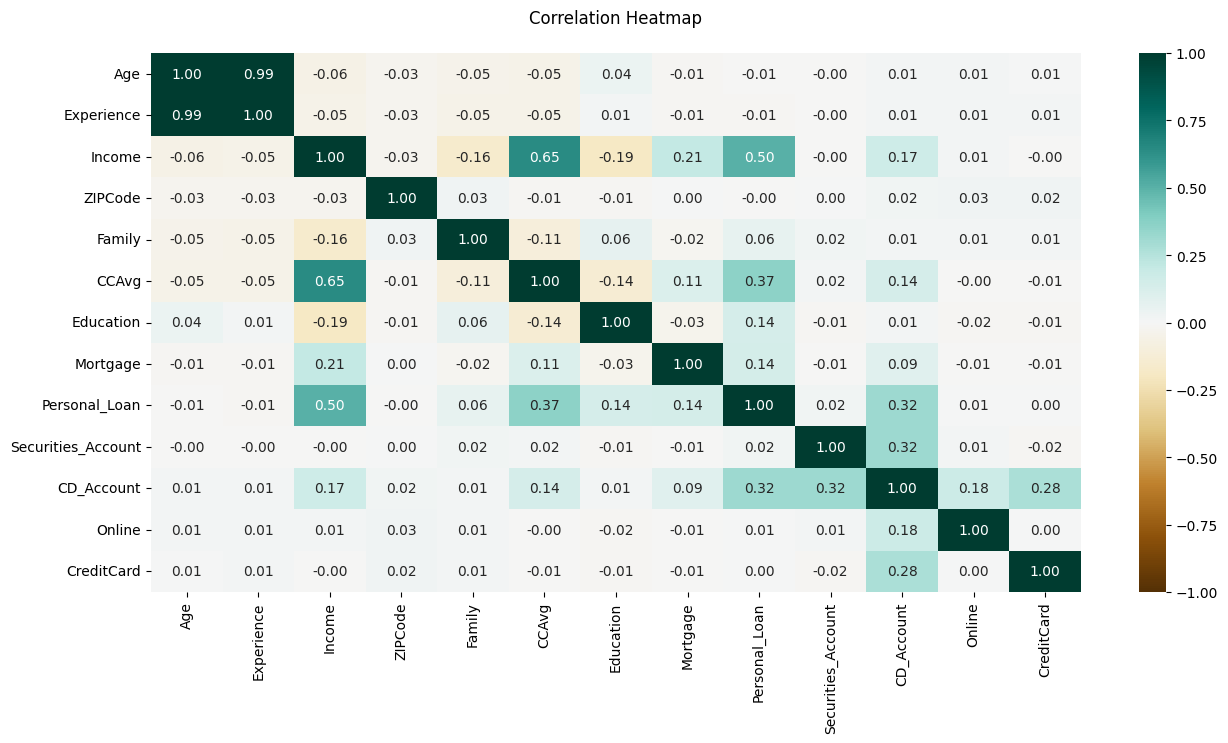

In [ ]:
# Assess the correlation among all columns.

plt.figure(figsize=(15, 7))                                    # Set the figure size
correlation_matrix = data.select_dtypes(include=['number'])    # Select numerical columns for Heatmap

# Plot the heatmap using Seaborn
heatmap = sns.heatmap(correlation_matrix.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="BrBG")
heatmap.set_title('Correlation Heatmap', y=1.04)              # Set the title and position it
plt.show()                                                    # Display the Plot

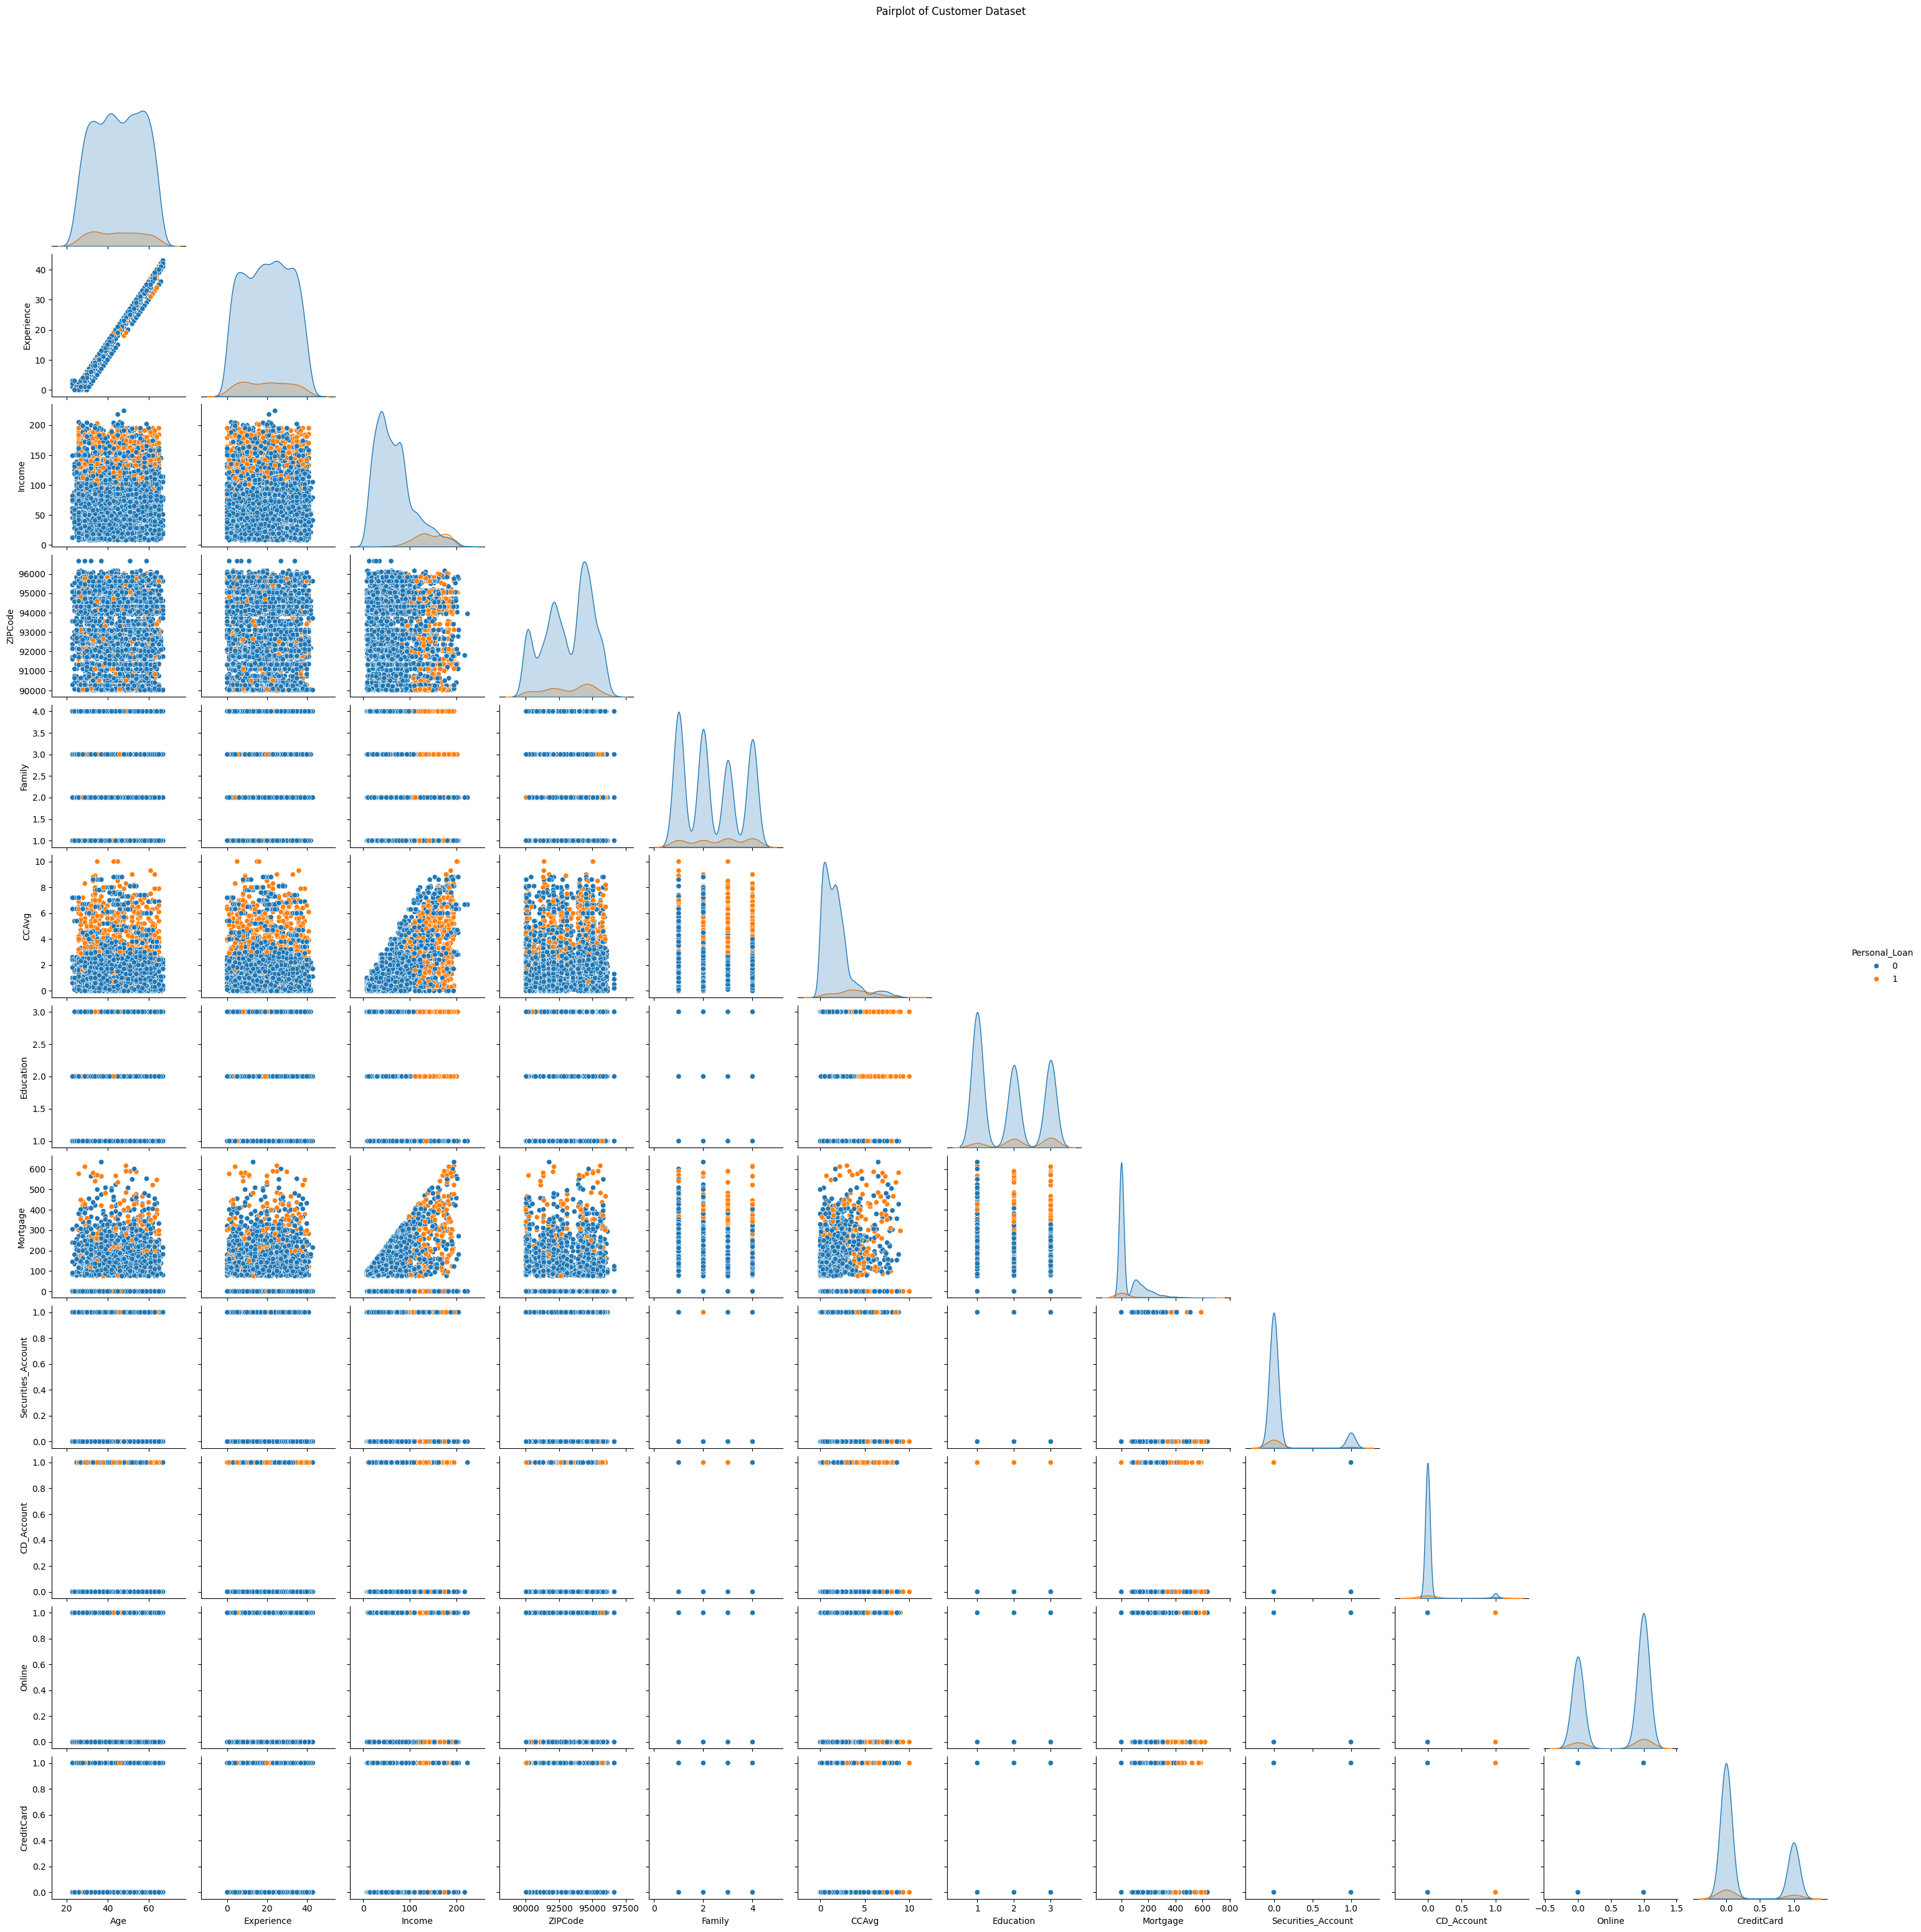

In [ ]:
# Create a pairplot for Bivariate analysis
sns.pairplot(data, diag_kind="kde", hue="Personal_Loan", corner=True)
plt.suptitle('Pairplot of Customer Dataset', y=1.04)
plt.show()

**Observation**:
 - Age and Experience exhibit a very high positive correlation, indicating that professional experience tends to increase with age. This relationship is expected.
 - Income shows a positive correlation with credit card spending and personal loan amount. Higher income is associated with higher credit card spending and a greater tendency to take out personal loans.
 - A moderate positive relationship exists between personal loans and average credit card spending. It appears that some customers may have taken a personal loan to pay off their credit card expenses.

#### Personal Loan vs Age

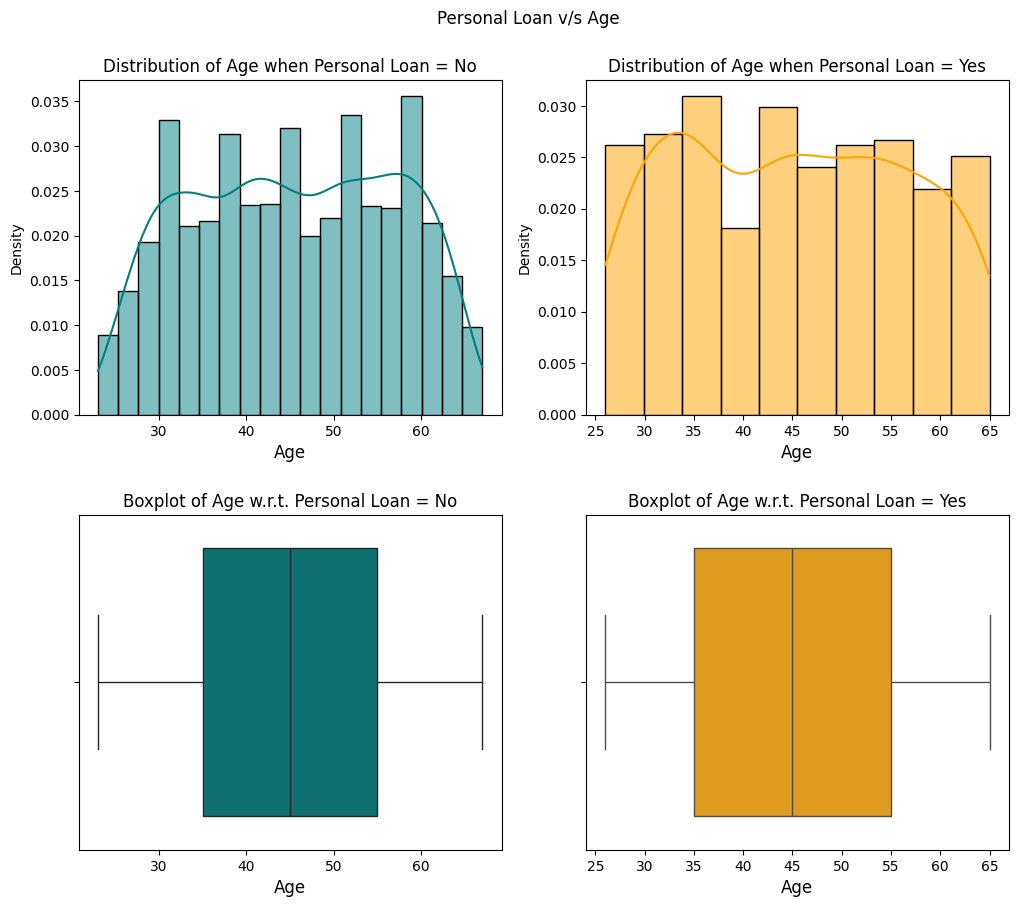

In [ ]:
# Define mapping of numerical values to respective categorical values for Personal Loan Column
mapping_Personal_Loan = {0: 'No', 1: 'Yes'}

# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(data, "Age", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              ked = True)

**Observation**:
The age distribution among customers with Personal Loans and without Personal Loans is similar, indicating that interest in Personal Loans is not significantly influenced by age.

#### Personal Loan vs Experience

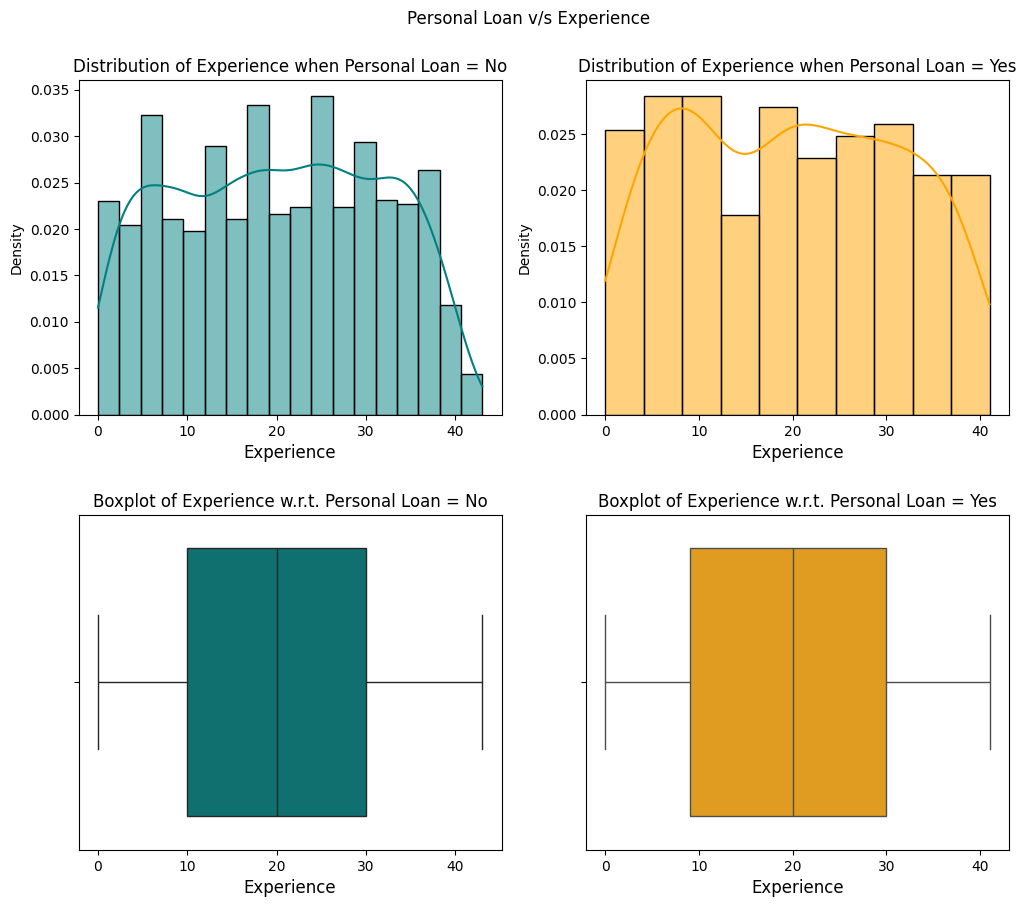

In [ ]:
# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(data, "Experience", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              ked = True)

**Observation**:
The distribution of professional experience among customers, both with and without Personal Loans, is similar, suggesting that interest in Personal Loans is not significantly influenced by professional experience.

#### Personal Loan vs Income

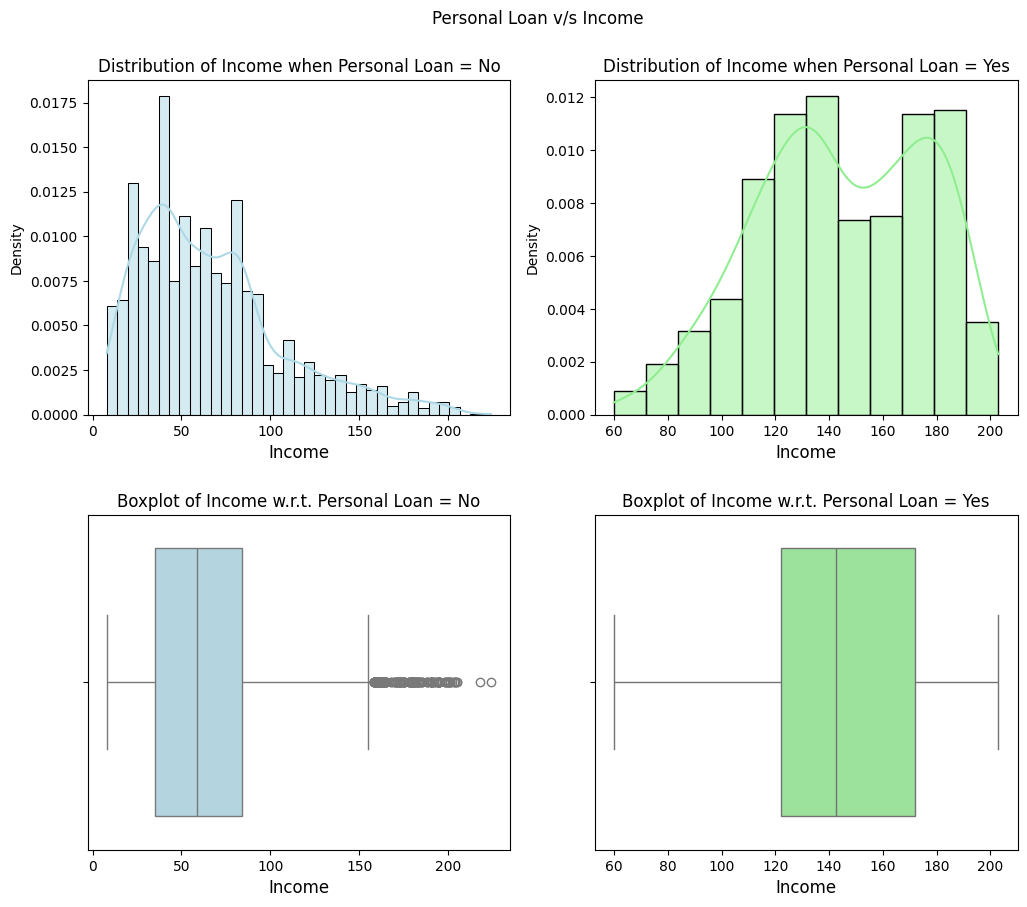

In [ ]:
# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(data, "Income", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              Color = ["lightblue", "lightgreen"], ked = True)

**Observation**:
 - The income distribution among customers who have taken a Personal Loan is left-skewed, indicating a higher proportion of high-income customers among Personal Loan holders compared to low-income customers. The average income of Personal Loan holders exceeds \$140,000 annually. The minimum average income of customers who accepted the loan is around \$60,000.
 - The income distribution among customers who have not taken a Personal Loan is right-skewed, with numerous outliers. This suggests that potential loan customers primarily belong to the low-income category (with an average income close to \$55,000 annually). However, the presence of outliers above the upper whisker indicates that there are also a few customers with very high incomes have not taken personal loan.

#### Personal Loan vs Family Size

╒═════════════════╤══════╤═══════╤═══════╕
│ Personal Loan   │   No │   Yes │   All │
│ Family          │      │       │       │
╞═════════════════╪══════╪═══════╪═══════╡
│ 2               │ 1190 │   106 │  1296 │
├─────────────────┼──────┼───────┼───────┤
│ 1               │ 1365 │   107 │  1472 │
├─────────────────┼──────┼───────┼───────┤
│ 3               │  877 │   133 │  1010 │
├─────────────────┼──────┼───────┼───────┤
│ 4               │ 1088 │   134 │  1222 │
├─────────────────┼──────┼───────┼───────┤
│ All             │ 4520 │   480 │  5000 │
╘═════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


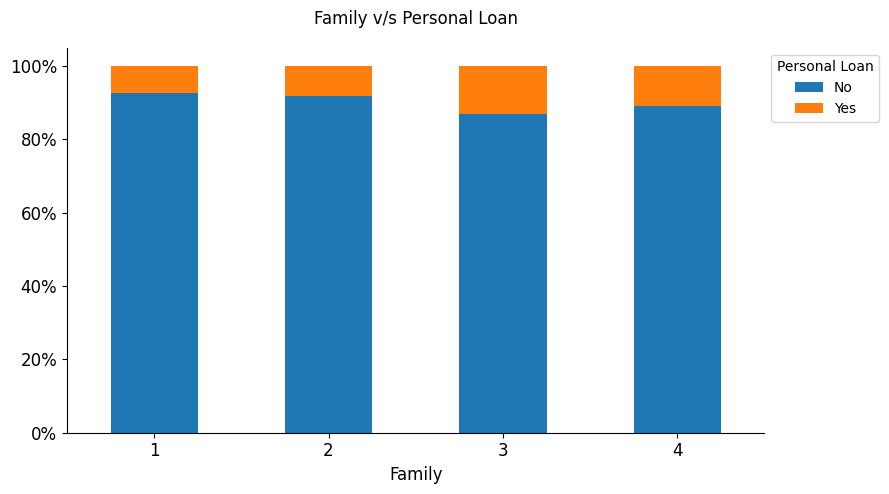

In [ ]:
# Print a table with data where predictor is on x column and target is stacked
print_table(data, "Family", "Personal_Loan",
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "Family", "Personal_Loan",   # Plot Data
                column_mapping = mapping_Personal_Loan,
                )

**Observation**:
Among customers with family sizes of 3 to 4, there is a tendency to take out more Personal Loans compared to those with family sizes of 1 or 2.

#### Personal Loan vs Education

╒═══════════════════════╤══════╤═══════╤═══════╕
│ Personal Loan         │   No │   Yes │   All │
│ Education             │      │       │       │
╞═══════════════════════╪══════╪═══════╪═══════╡
│ Undergrad             │ 2003 │    93 │  2096 │
├───────────────────────┼──────┼───────┼───────┤
│ Graduate              │ 1221 │   182 │  1403 │
├───────────────────────┼──────┼───────┼───────┤
│ Advanced/Professional │ 1296 │   205 │  1501 │
├───────────────────────┼──────┼───────┼───────┤
│ All                   │ 4520 │   480 │  5000 │
╘═══════════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


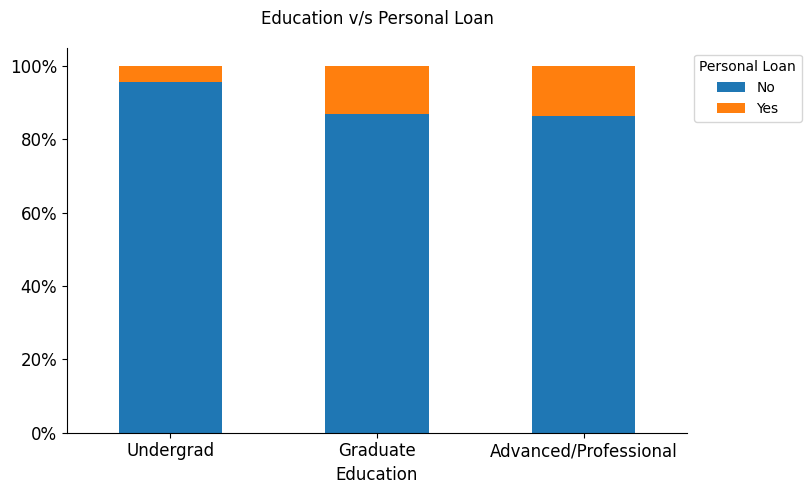

In [ ]:
# Define mapping of numerical values to respective categorical values for Education Column
mapping_Education = {1 : 'Undergrad', 2 : 'Graduate', 3 : 'Advanced/Professional'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "Education", "Personal_Loan",
            index_mapping = mapping_Education,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "Education", "Personal_Loan",   # Plot Data
                index_mapping = mapping_Education,
                column_mapping = mapping_Personal_Loan
                )

**Observation**: Customers with higher education levels tend to opt for more Personal Loans, likely due to their higher incomes.

#### Personal Loan vs Home Mortgage

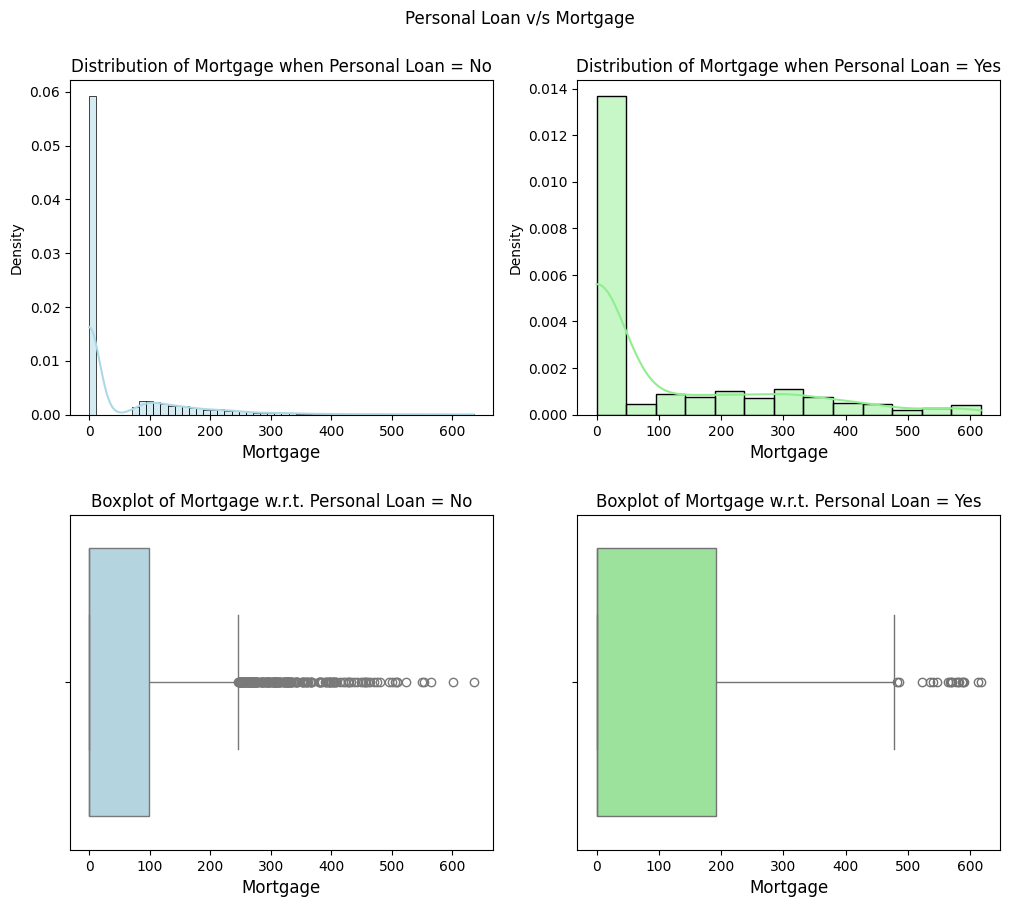

In [ ]:
# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              Color = ["lightblue", "lightgreen"], ked = True)

**Observation**:

 - The Home Mortgage amounts distribution for customers is majorly concentrated around Zero, whether they have taken personal loans or not. This suggests that a significant number of customers have not opted for a mortgage. Absence of lower whiskers on the box plots also indicates the same.
 - Comparison of both the box plots indicates that customers with a mortgage have a tendency to take more personal loans on average.

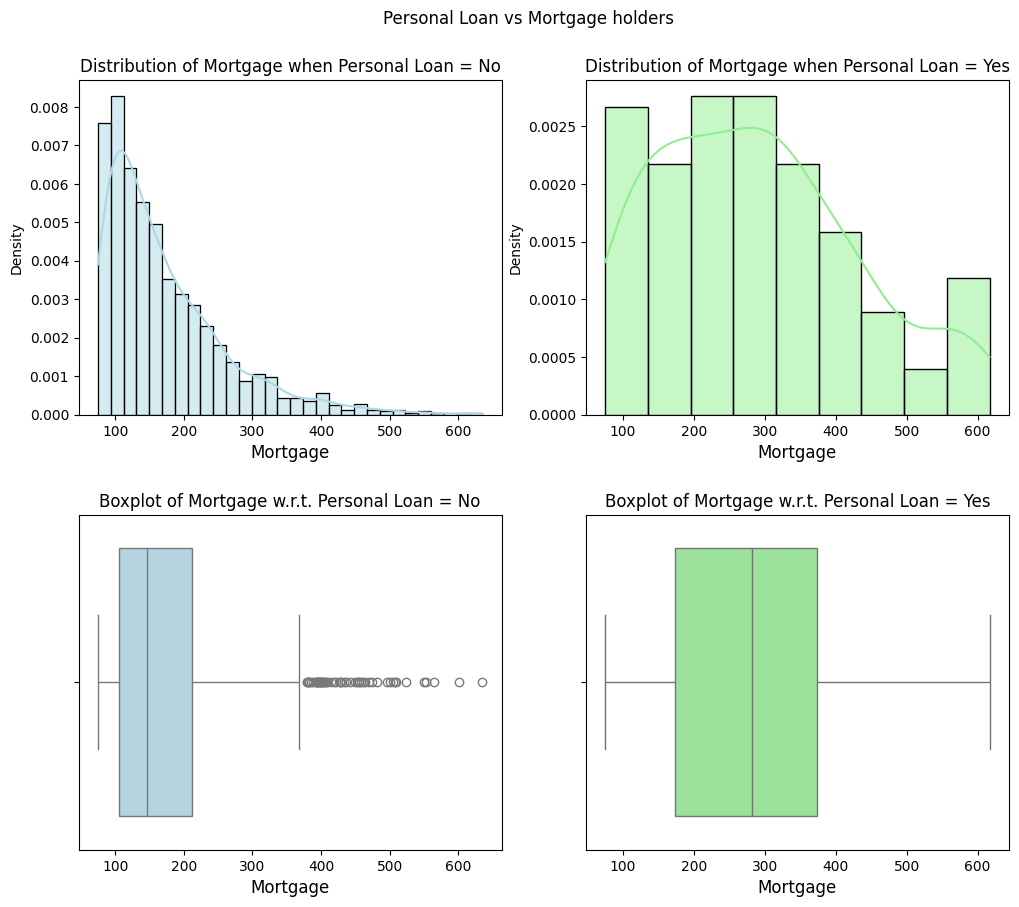

In [ ]:
# Get the customer not taken any mortgage
Mortgage_holders = data.loc[data['Mortgage'] != 0]

# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(Mortgage_holders, "Mortgage", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                             Title = "Personal Loan vs Mortgage holders",
                              Color = ["lightblue", "lightgreen"], ked = True)

**Observation**:
 - For Mortgage Holders who haven't taken personal loans, the box plot shows a right-skewed distribution with a median Mortgage amount of about \$145,000. This suggests that over 50% of these customers have Home mortgages under $150,000. The presence of outliers indicates that some customers have opted for very high mortgage amounts.
 - The box plot depicting customers with both Home Mortgages and Personal Loans shows a right-skewed distribution, with a median mortgage amount of approximately \$290,000. This implies that customers who have taken personal loans also tend to take higher mortgage amounts, and vice versa.

#### Personal_Loan vs Credit Card Usage

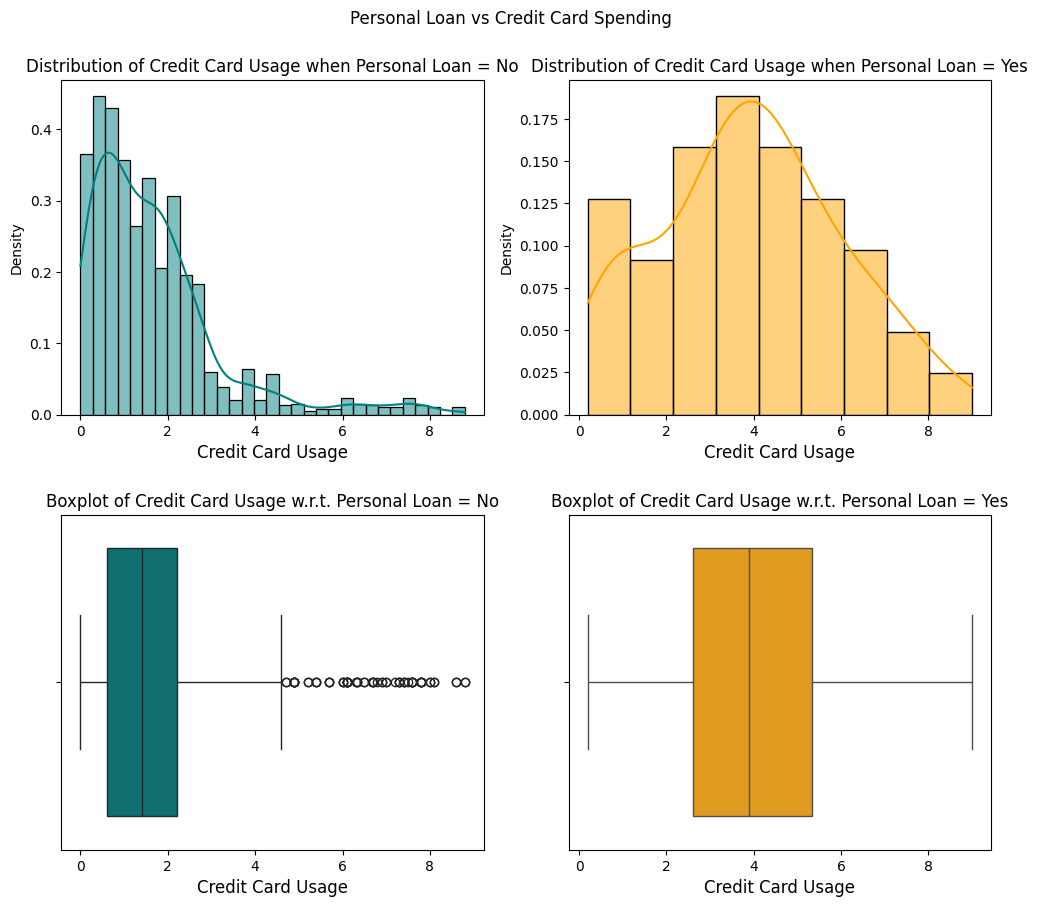

In [ ]:
# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(Mortgage_holders, "CCAvg", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              Title = "Personal Loan vs Credit Card Spending",
                              xlabel = "Credit Card Usage",
                              ked = True,
                              )

**Observation**:
 - The box plot illustrating customers who have taken Personal Loans have a slightly right-skewed distribution, with a median monthly Credit Card spending of approximately \$3,800.
 - Conversely, for customers who haven't taken personal loans, the box plot displays a right-skewed distribution with a median monthly Credit Card spending of around \$1,400. This indicates that the typical Credit Card spending among these customers is significantly lower compared to those who have taken Personal Loans. Notably, the presence of outliers suggests that certain customers exhibit very high Credit Card spending patterns.
 - Therefore, it can be inferred that customers who have higher Credit Card spending seems prefer personal loans.

#### Personal Loan vs Secutities Account

╒══════════════════════╤══════╤═══════╤═══════╕
│ Personal Loan        │   No │   Yes │   All │
│ Securities Account   │      │       │       │
╞══════════════════════╪══════╪═══════╪═══════╡
│ Yes                  │  462 │    60 │   522 │
├──────────────────────┼──────┼───────┼───────┤
│ No                   │ 4058 │   420 │  4478 │
├──────────────────────┼──────┼───────┼───────┤
│ All                  │ 4520 │   480 │  5000 │
╘══════════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


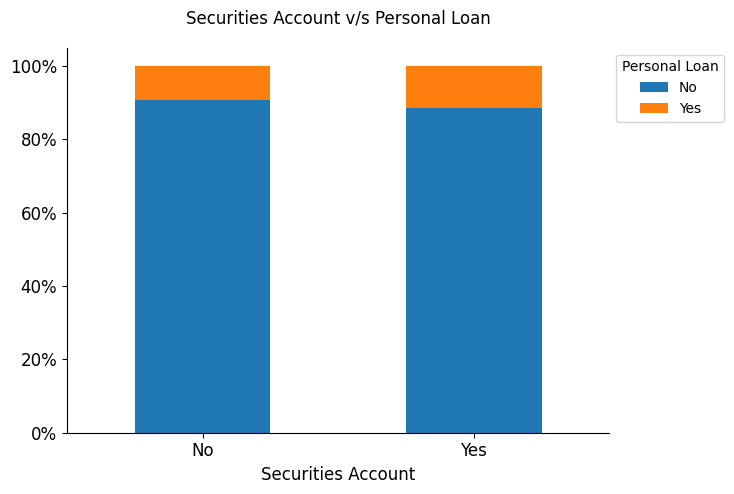

In [ ]:
# Define mapping of numerical values to respective categorical values for Security Accounts
mapping_Securities_Account = {0: 'No', 1: 'Yes'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "Securities_Account", "Personal_Loan",
            index_mapping = mapping_Securities_Account,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "Securities_Account", "Personal_Loan",   # Plot Data
                index_mapping = mapping_Securities_Account,
                column_mapping = mapping_Personal_Loan,
                )

**Observation**: Around 10 percent of customers have a securities account with the bank, regardless of whether they have taken a personal loan.

#### Personal Loan vs CD Accounts

╒═════════════════╤══════╤═══════╤═══════╕
│ Personal Loan   │   No │   Yes │   All │
│ CD Account      │      │       │       │
╞═════════════════╪══════╪═══════╪═══════╡
│ Yes             │  162 │   140 │   302 │
├─────────────────┼──────┼───────┼───────┤
│ No              │ 4358 │   340 │  4698 │
├─────────────────┼──────┼───────┼───────┤
│ All             │ 4520 │   480 │  5000 │
╘═════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


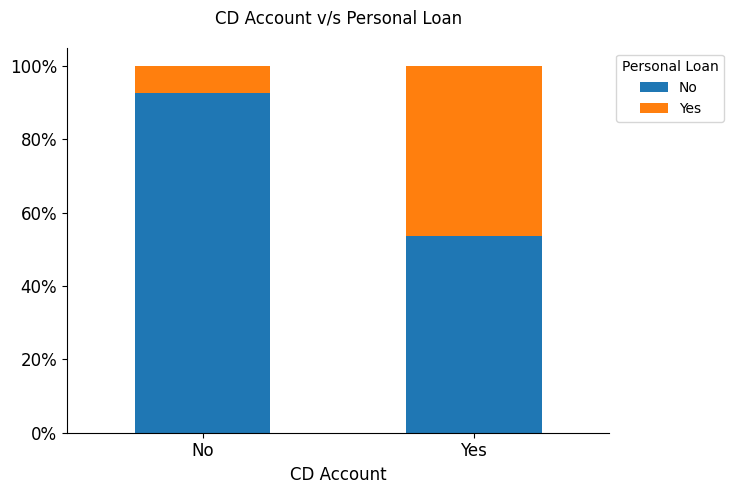

In [ ]:
# Define mapping of numerical values to respective categorical values for Security Accounts
mapping_CD_Account = {0: 'No', 1: 'Yes'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "CD_Account", "Personal_Loan",
            index_mapping = mapping_CD_Account,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "CD_Account", "Personal_Loan",   # Plot Data
                index_mapping = mapping_CD_Account,
                column_mapping = mapping_Personal_Loan
                )

**Observation**: Customers with Personal Loans have a higher ownership rate of CD accounts, about 46% among all Personal Loan holders, while those without Personal Loans have a lower ownership rate, approximately 7% among all non-Personal Loan holders.

#### Personal Loan vs Online Access

╒═════════════════╤══════╤═══════╤═══════╕
│ Personal Loan   │   No │   Yes │   All │
│ Online          │      │       │       │
╞═════════════════╪══════╪═══════╪═══════╡
│ No              │ 1827 │   189 │  2016 │
├─────────────────┼──────┼───────┼───────┤
│ Yes             │ 2693 │   291 │  2984 │
├─────────────────┼──────┼───────┼───────┤
│ All             │ 4520 │   480 │  5000 │
╘═════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


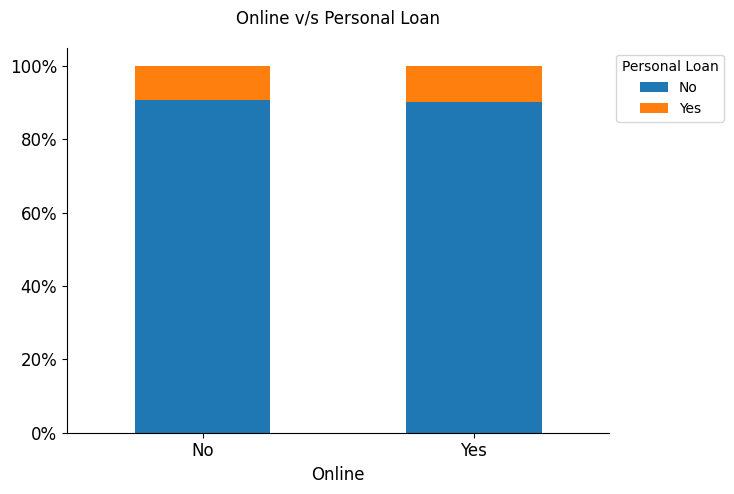

In [ ]:
# Define mapping of numerical values to respective categorical values for Security Accounts
mapping_Online = {0: 'No', 1: 'Yes'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "Online", "Personal_Loan",
            index_mapping = mapping_Online,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "Online", "Personal_Loan",   # Plot Data
                index_mapping = mapping_Online,
                column_mapping = mapping_Personal_Loan
                )

**Observation**:
Irrespective of whether they have a Personal Loan, only about 10% of customers possess credit cards from different banks.

#### Personal Loan vs Holding Credit Card from different banks

╒═════════════════╤══════╤═══════╤═══════╕
│ Personal Loan   │   No │   Yes │   All │
│ CreditCard      │      │       │       │
╞═════════════════╪══════╪═══════╪═══════╡
│ Yes             │ 1327 │   143 │  1470 │
├─────────────────┼──────┼───────┼───────┤
│ No              │ 3193 │   337 │  3530 │
├─────────────────┼──────┼───────┼───────┤
│ All             │ 4520 │   480 │  5000 │
╘═════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


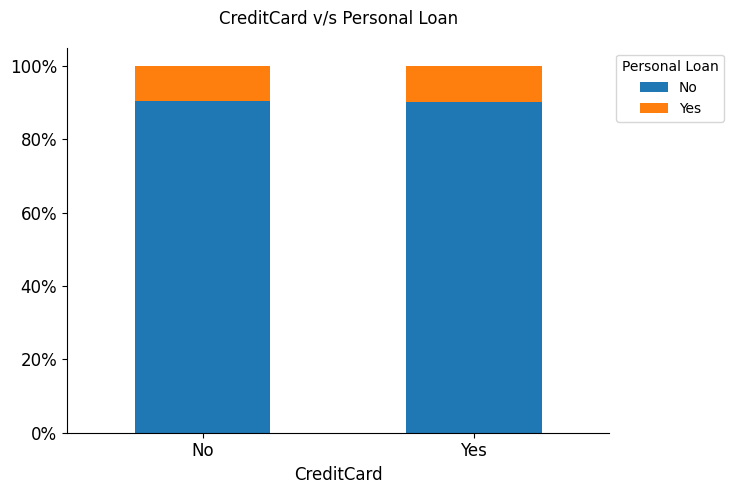

In [ ]:
# Define mapping of numerical values to respective categorical values for Security Accounts
mapping_CreditCard = {0: 'No', 1: 'Yes'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "CreditCard", "Personal_Loan",
            index_mapping = mapping_CreditCard,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "CreditCard", "Personal_Loan",   # Plot Data
                index_mapping = mapping_CreditCard,
                column_mapping = mapping_Personal_Loan
                )

**Observation**: Regardless of whether they have a personal loan, only about 10% of customers have credit cards from other banks.

#### Personal Loan vs County

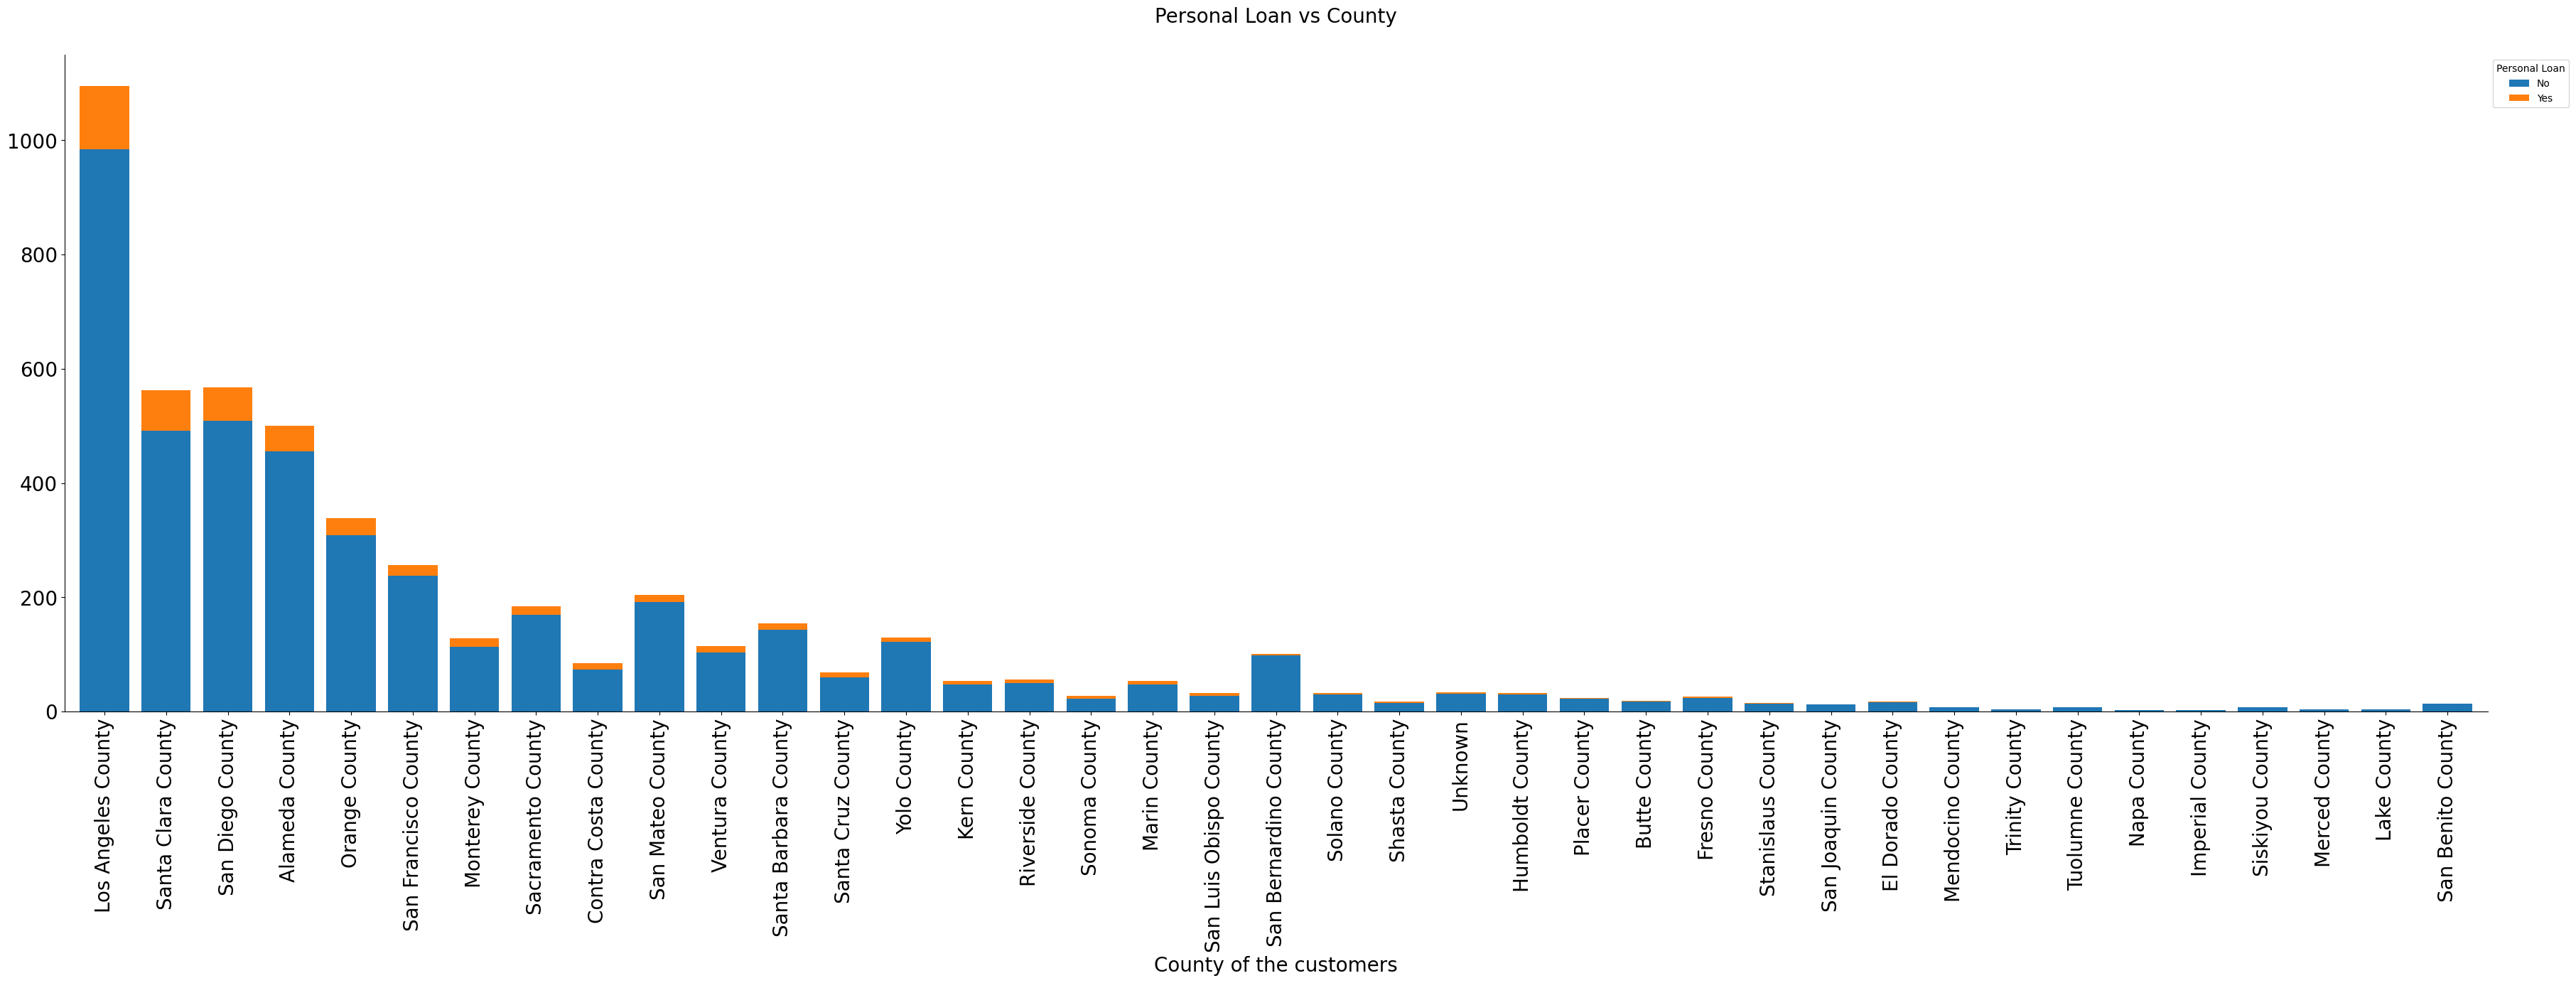

In [ ]:
# Stached a Barplot of Counties
stacked_barplot(data, "County", "Personal_Loan",   # Plot Data
                column_mapping = mapping_Personal_Loan,
                Title = "Personal Loan vs County",
                xlabel = "County of the customers",
                normatized_by_index = False,
                fontsize = 20,
                degree = 90,
                figsize_height = 12,
                linewidth = 0.8,
                )

**Observation**:
 - Los Angeles County has the highest number of customers who borrowed a personal loan, followed by Santa Clara and San Diego counties.
 - Additionally, Los Angeles County also has the highest number of customers who rejected a personal loan, followed by San Diego County and then Santa Clara County.

###  **Conclusion**: Based on the bivariate analysis, the following conclusions can be drawn:
 - Income, education, family size, and credit card usage are the most significant predictors of potential loan customers. Higher values in these parameters are positively correlated with a higher likelihood of taking out a personal loan.
 - Customers with home mortgages tend to have a higher average number of personal loans.
 - Customers with separate securities and CD accounts are more likely to obtain a personal loan.

## Data preparation for Modeling

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Missing Value Treatment

 - The customer data is complete, with no null or missing values in any column, thereby eliminating the need for missing value treatment.

### Feature Engineering

 - Feature engineering was performed by converting the Zip code column into its corresponding County column, creating a new feature that can be used for analysis.

### Identify Catagorical Columns

In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Family",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "County",
]
data[cat_cols] = data[cat_cols].astype("category")

# check the datatype of all the column after convertion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 275.8 KB
None


### Outlier Detection

#### Define Useful functions

In [ ]:
# Function to calculate whiskers and count outliers
def calculate_whiskers_and_outliers(data, column_name):
    # Calculate quartiles
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate IQR and whiskers
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Count outliers
    outliers =(data[column_name] < lower_whisker) | (data[column_name] > upper_whisker)
    outlier_count = outliers.sum()  # Sum of True values gives the count of outliers

    return lower_whisker, upper_whisker, outlier_count

In [ ]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    # identify the outliers
    Lower, Upper = calculate_whiskers(df, col)

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower, Upper)

    return df

In [ ]:
# Function to treat outliers for all the columns
def treat_outliers_all(df, col_list):
  for c in col_list:
    df = treat_outliers(df, c)

In [ ]:
# Display Boxplots of numerical columns to check outliers
def display_boxplots(data, txt = None, whis = 1.5, color = "lightgreen"):
  # Identify the number of numerical column
  numerical_columns = data.select_dtypes(include=[np.number]).columns

  fig, axs = plt.subplots(1,len(numerical_columns), figsize=(18, 8))

  # Loopthrough all the variables
  for i, variable in enumerate(numerical_columns):
    # Create a boxplot for each variable
    sns.boxplot(data[variable], whis = whis, ax = axs[i], color = color)
    axs[i].set_title(variable.replace("_", " "))                          # Set the title of the Box plot
    axs[i].set_ylabel('')                                                 # Remove y-axis label

    # Caculate lower Whisker, Upper Whisker and no of outliers
    lower, upper, outlier_count = calculate_whiskers_and_outliers(data, variable)

    percentage_outliers = "{:.2f}".format(outlier_count / len(data['Age']) * 100)      # Calculate % of Outliers

    # Add text to the plot
    text = f"Lower Whisker: {lower}\nUpper Whisker: {upper}\nNumber of outliers: {outlier_count}\n% of outliers: {percentage_outliers}%"

    # Add text to the plot
    axs[i].text(0.05, -0.11, text, fontsize=10, ha='left', va='bottom', transform=axs[i].transAxes)  #

  plt.subplots_adjust(wspace=0.1)  # Adjust the spacing between subplots as needed
  plt.tight_layout()
  plt.show()  # Display the plot

#### Outlier Visualization

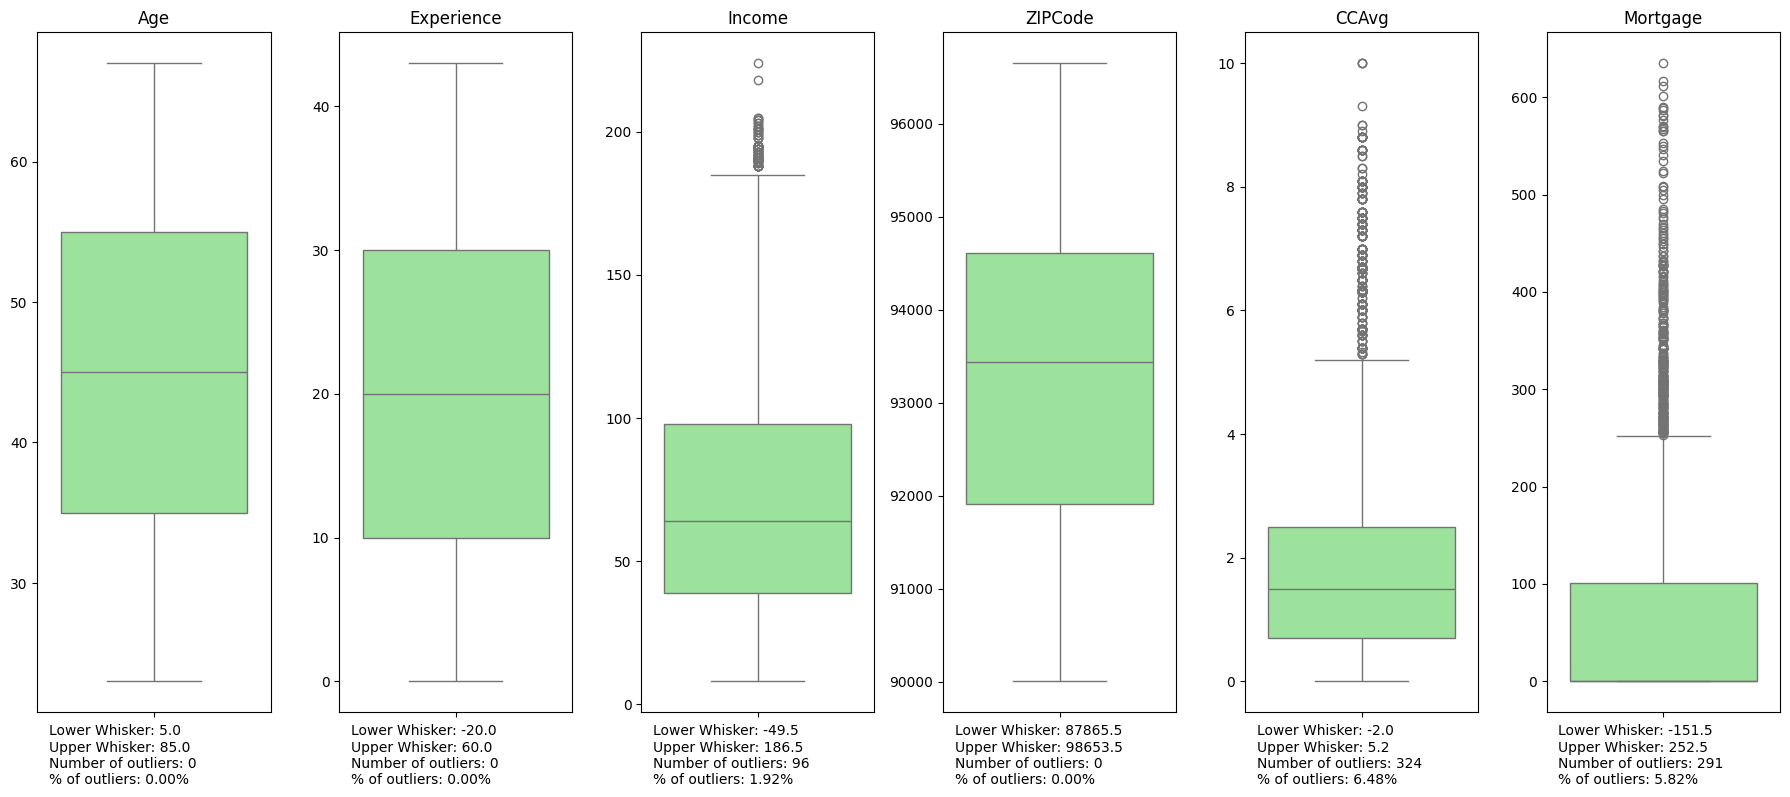

In [ ]:
# Display Boxplot of numerical columns before outlier treatment
display_boxplots(data)


**Observation**: Our analysis reveals a significant number of outliers in the data. However, after careful review, we have determined that these outliers are legitimate values and not errors. Therefore, we will not treat or remove them, as they are an authentic representation of the data."


## Splitting data in train and test sets

In [ ]:
# Dropping Experience as it is perfectly correlated with Age
# Also drop Zip Code Column because we will be using the new County column instead
X = data.drop(["Personal_Loan", "Experience", "ZIPCode"], axis=1)
Y = data["Personal_Loan"]

# Creating dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
# Display training and test set information
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 51)
Shape of test set :  (1500, 51)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


**Observation**: We note that the dependent variable classes are well-balanced in both the training and test sets, with a relatively even distribution of samples across all classes. This is a desirable property, as it allows our model to learn from a representative sample of the data and reduces the risk of bias towards a particular class. This balance will help us build a more robust and generalizable model.

## Model Building

### Model Evaluation Criterion

The model's predictions can be incorrect in two ways:

 - **False Positive (FP)**: Predicting a customer will borrow a personal loan when they don't.
 - **False Negative (FN)**: Predicting a customer won't borrow a personal loan when they do.

**Prediction Focus**:
Our primary concern is minimizing False Negatives (FN), as AllLife Bank aims to expand its loan business, and every customer who borrows a personal loan is crucial.

**Reducing False Negatives**:
To minimize False Negatives, we should aim to maximize the Recall score. A higher Recall score indicates a greater ability to predict potential customers who will borrow a personal loan.

   **Recall (Sensitivity) = TP / (TP + FN)**

Where TP = True Positives (correctly predicted loan borrowers)
By prioritizing Recall, we can reduce the number of missed opportunities (False Negatives) and improve the model's ability to identify potential customers who will borrow a personal loan.

### Define useful functions

First, let's create functions to calculate different metrics and confusion matrix and a function to display Desicion Tree so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.
* The Display_Decition_Tree will be used to represent the Tree Graphically

In [ ]:
# function to plot the confusion_matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    caption = [
                "True Negative (TN)",
                "False Positive (FP)\n Type I Error",
                "False Negative (FN) \n Type II Error",
                "True Positive (TP)",
               ]

    # predicting using the independent variables
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)   # build the Confusion Matrix

    labels = np.asarray(                    # define the lebels for the Matrix
        [
            ["{0:0.0f}\n".format(item) + "{0:.2%}\n".format(item / cm.flatten().sum()) + caption[index]]
            for index, item in enumerate(cm.flatten())
        ]
    ).reshape(2, 2)

    # Display the confusion Matrix
    plt.figure(figsize=(8, 6))                                          # set the figure size
    sns.heatmap(cm, annot = labels, fmt="", annot_kws={"size": 12})     # plot the confusion matrix
    plt.ylabel("Actual Values", fontsize = 15)                          # set the y-axis label
    plt.xlabel("Predicted Values", fontsize = 15)                       # set the x-axis label
    plt.xticks([0.5, 1.5], ['Negative', 'Positive'])                    # set the x-axis tick labels
    plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=90)       # set the y-axis tick labels
    plt.show()                                                          # show the plot

In [ ]:
# Function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target,
                                             Title = None,
                                             ):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0] if Title == None else [Title],
    )

    return df_perf

In [ ]:
# Build a display for Decision Tree
def Display_Decision_Tree(model, set, figsize):
  plt.figure(figsize = figsize)
  plt.title("Decision Tree")
  plt.tight_layout()

  # Extract feature names from the training set
  feature_names = list(set.columns)

  # plot the decision tree
  out = tree.plot_tree(model, feature_names = feature_names, filled=True, fontsize=9, node_ids=False, class_names=None)

  # below code will add arrows to the decision tree split if they are missing
  for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
      arrow.set_edgecolor("black")
      arrow.set_linewidth(1)

  plt.show()  # Display the decision tree

### Building Initial Model

#### Build Decision Tree Model

In [ ]:
# Building a Decision Tree using default 'gini' criteria
model = DecisionTreeClassifier(criterion="gini", random_state=1)

# Fitting the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Model Performance Evaluation on Training Set

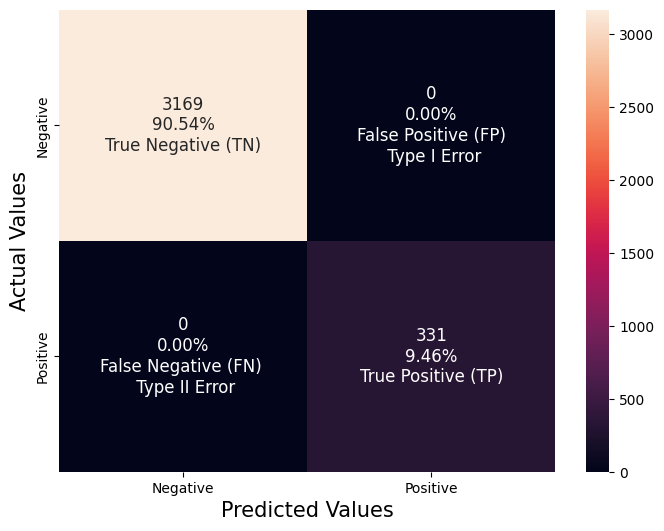

In [ ]:
# Build the Confusion Matrix of Training set to evaluate the Model Performance
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# Accuracy measures the overall correctness of the model's predictions,
# Precision and Recall focus on the quality of positive and negative predictions, respectively.
# F1 Score provides a balance between Precision and Recall, making it a more comprehensive metric for evaluating classification models
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train, "Decision Tree - Full grown : Training"
)
# Append the performance matrix of this Tree to amother Matrix to compare the performanc in future
decision_tree_perf_matrix = None
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_perf_train]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_perf_train]
                                                       ).index.duplicated(keep='last')]

decision_tree_perf_train

Accuracy  Recall  Precision  F1 Score
Decision Tree - Full grown : Training       1.0     1.0        1.0       1.0

#### Model Performance Evaluation on Testing Set

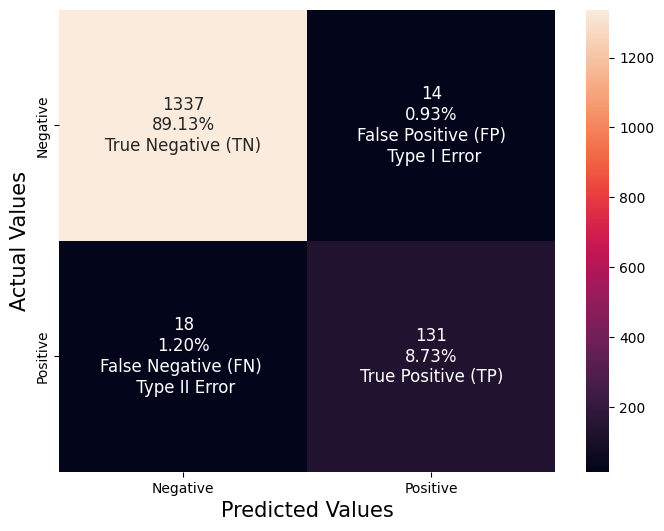

In [ ]:
# Build the Confusion Matrix of Testing set to evaluate the Model Performance
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# Accuracy measures the overall correctness of the model's predictions,
# Precision and Recall focus on the quality of positive and negative predictions, respectively.
# F1 Score provides a balance between Precision and Recall, making it a more comprehensive metric for evaluating classification models
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test, "Decision Tree - Full grown : Testing"
)
# Append the performance matrix of this Tree to amother Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_perf_test]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_perf_test]
                                                       ).index.duplicated(keep='last')]

decision_tree_perf_test

Accuracy    Recall  Precision  F1 Score
Decision Tree - Full grown : Testing  0.978667  0.879195   0.903448  0.891156

#### **Observation**:
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.
* This initial decision tree has reached its maximum complexity (fully grown), indicating that the model is overfit. As a result, it can accurately classify all data points in the Training Set without making any errors but can't do the same on Testing Set

#### Visualizing the Decision Tree

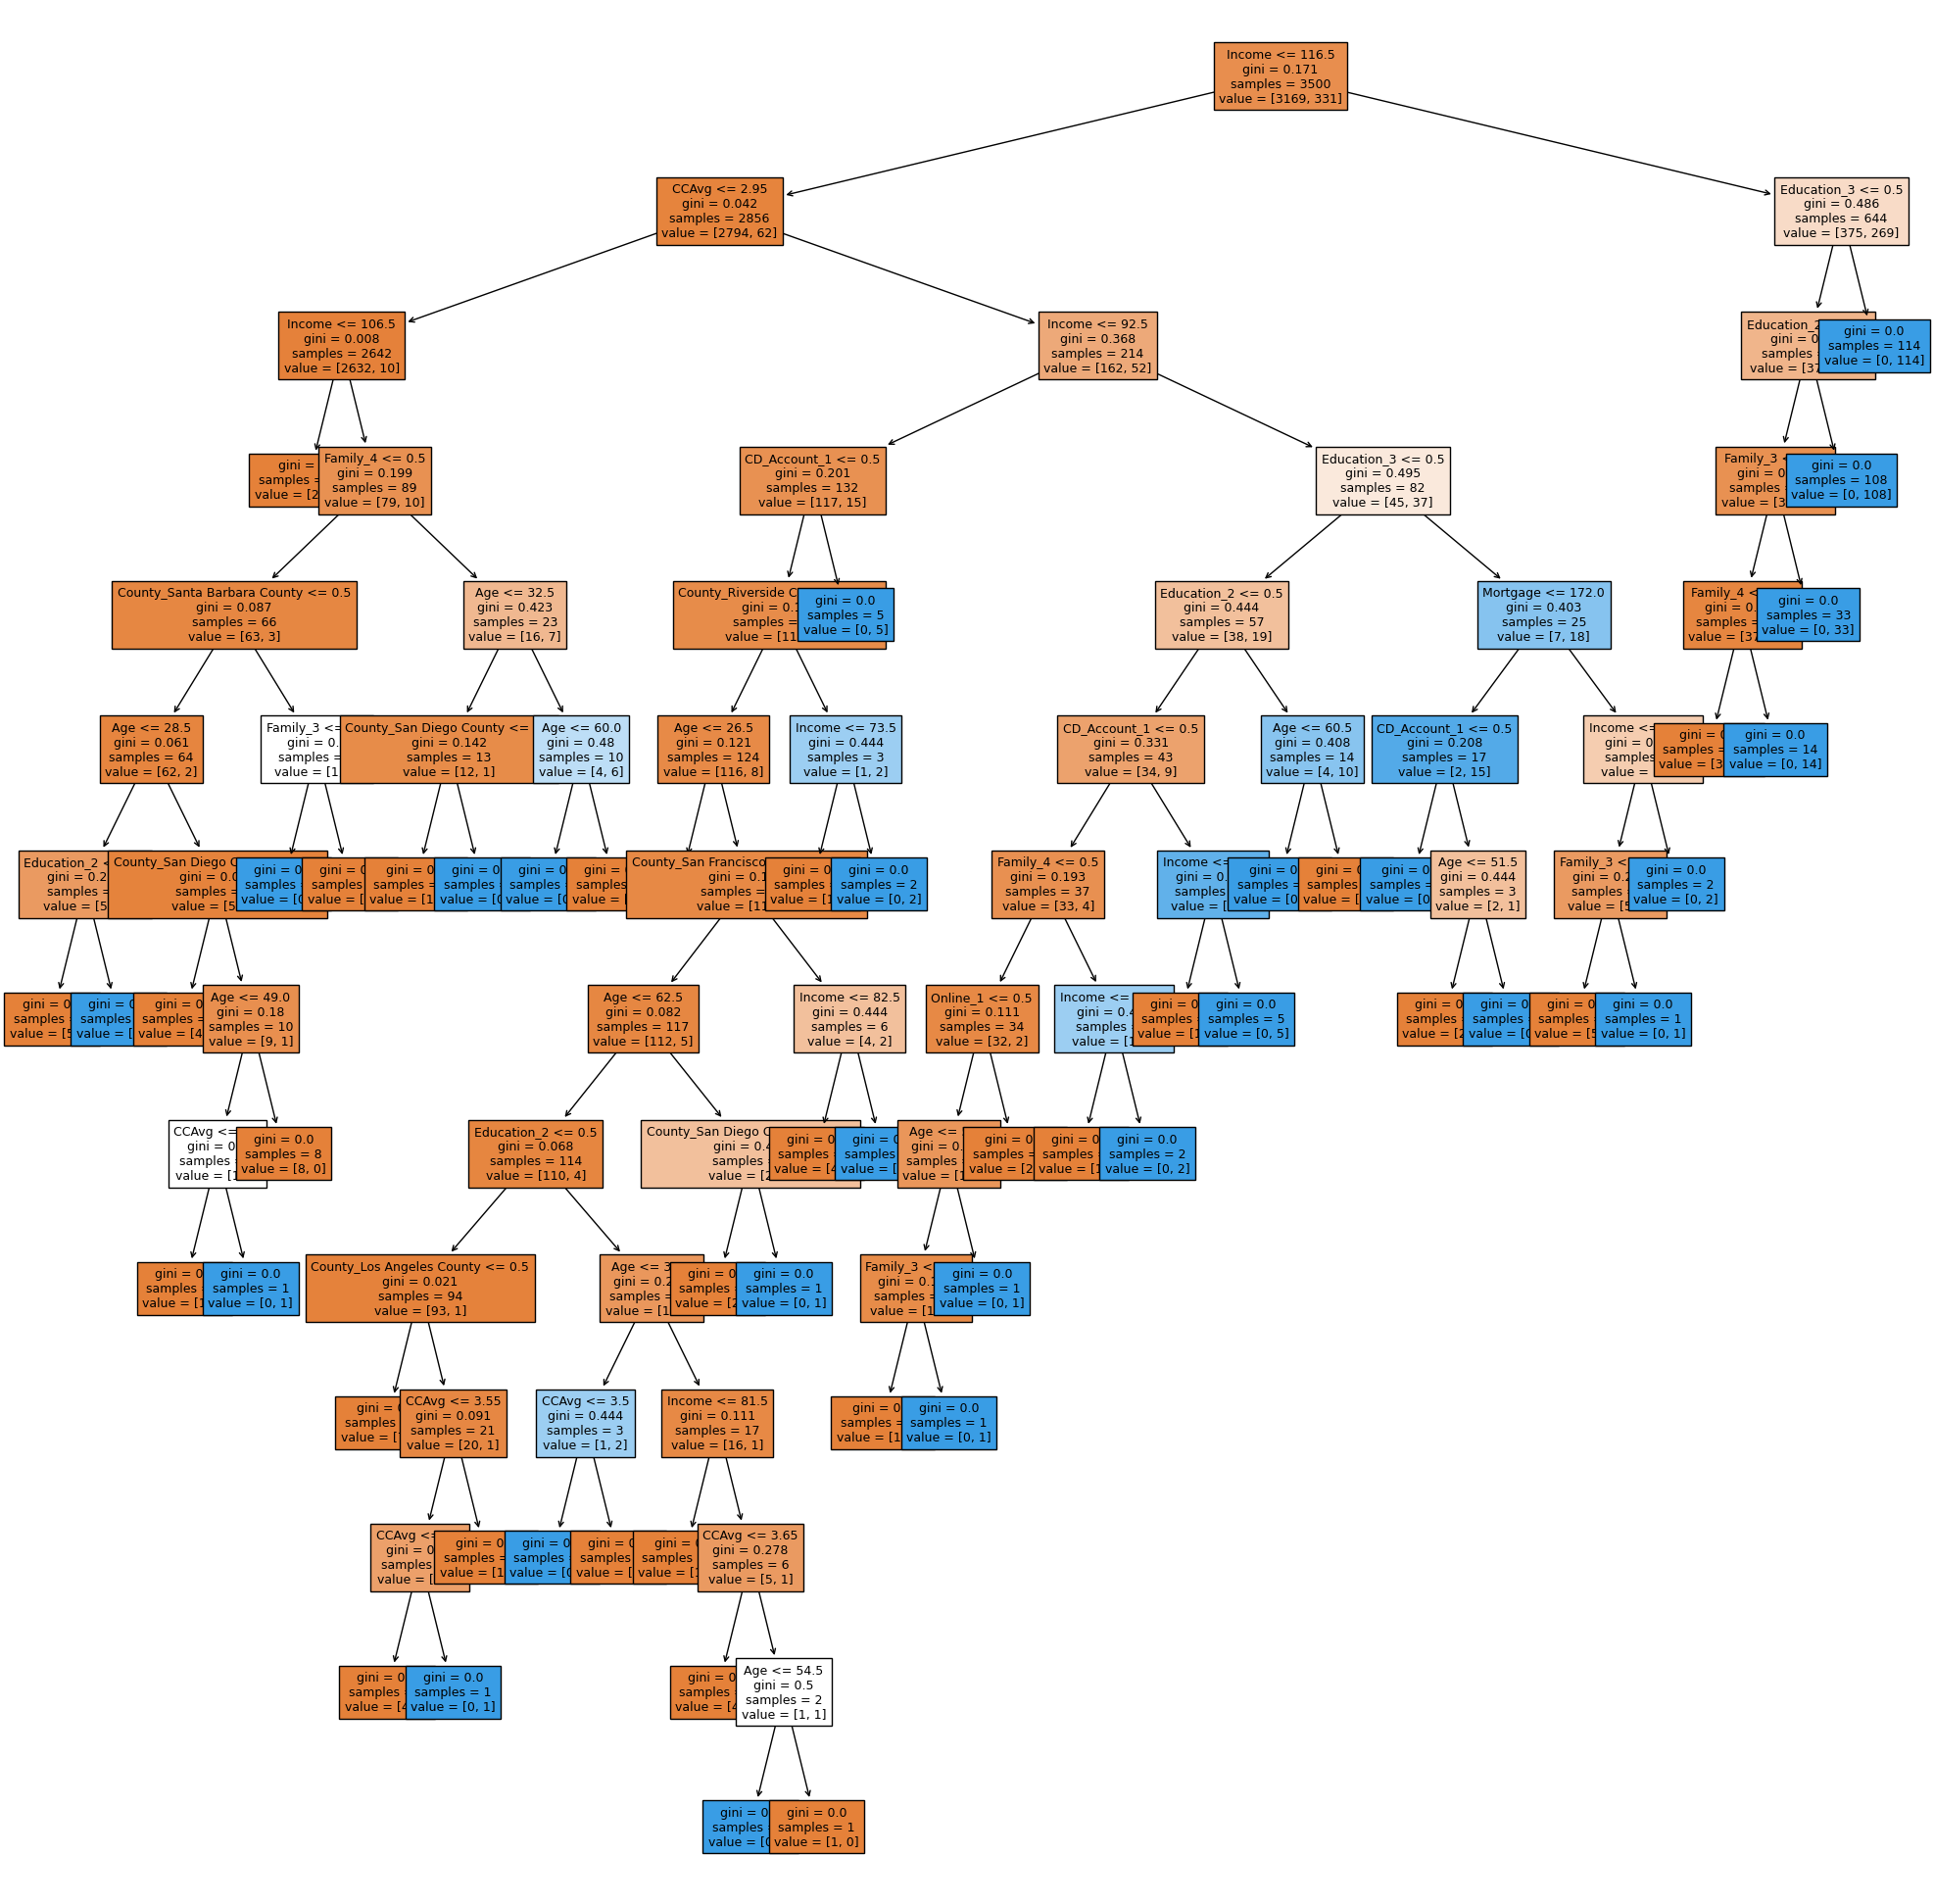

In [ ]:
# Display the Decision Tree by calling the Display_Decision_Tree() function defined earlier
Display_Decision_Tree(model, X_train, figsize=(20, 20))

#### Rules of the Decision Tree

In [ ]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- County_Santa Barbara County <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- County_San Diego County <= 0.50
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- County_San Diego County >  0.50
|   |   |   |   |   |   |   |--- Age <= 49.00
|   |   |   |   |   |   |   |   |--- CCAvg <= 1.40
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  1.40
|   |   |   |   |   |   |   |   |   |--- wei

**Observation**: The tree shown above is fully grown, making it complex and challenging to interpret

#### Evaluate Gini importance

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.313330
Education_2                    0.239413
Education_3                    0.165389
Family_3                       0.101855
Family_4                       0.052246
CCAvg                          0.045979
Age                            0.037929
CD_Account_1                   0.026348
County_San Diego County        0.005581
Mortgage                       0.004672
County_Riverside County        0.003544
County_San Francisco County    0.001608
County_Santa Barbara County    0.001422
Online_1                       0.000561
County_Los Angeles County      0.000123
County_Santa Clara County      0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Sonoma County           0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Solano County           0.000000


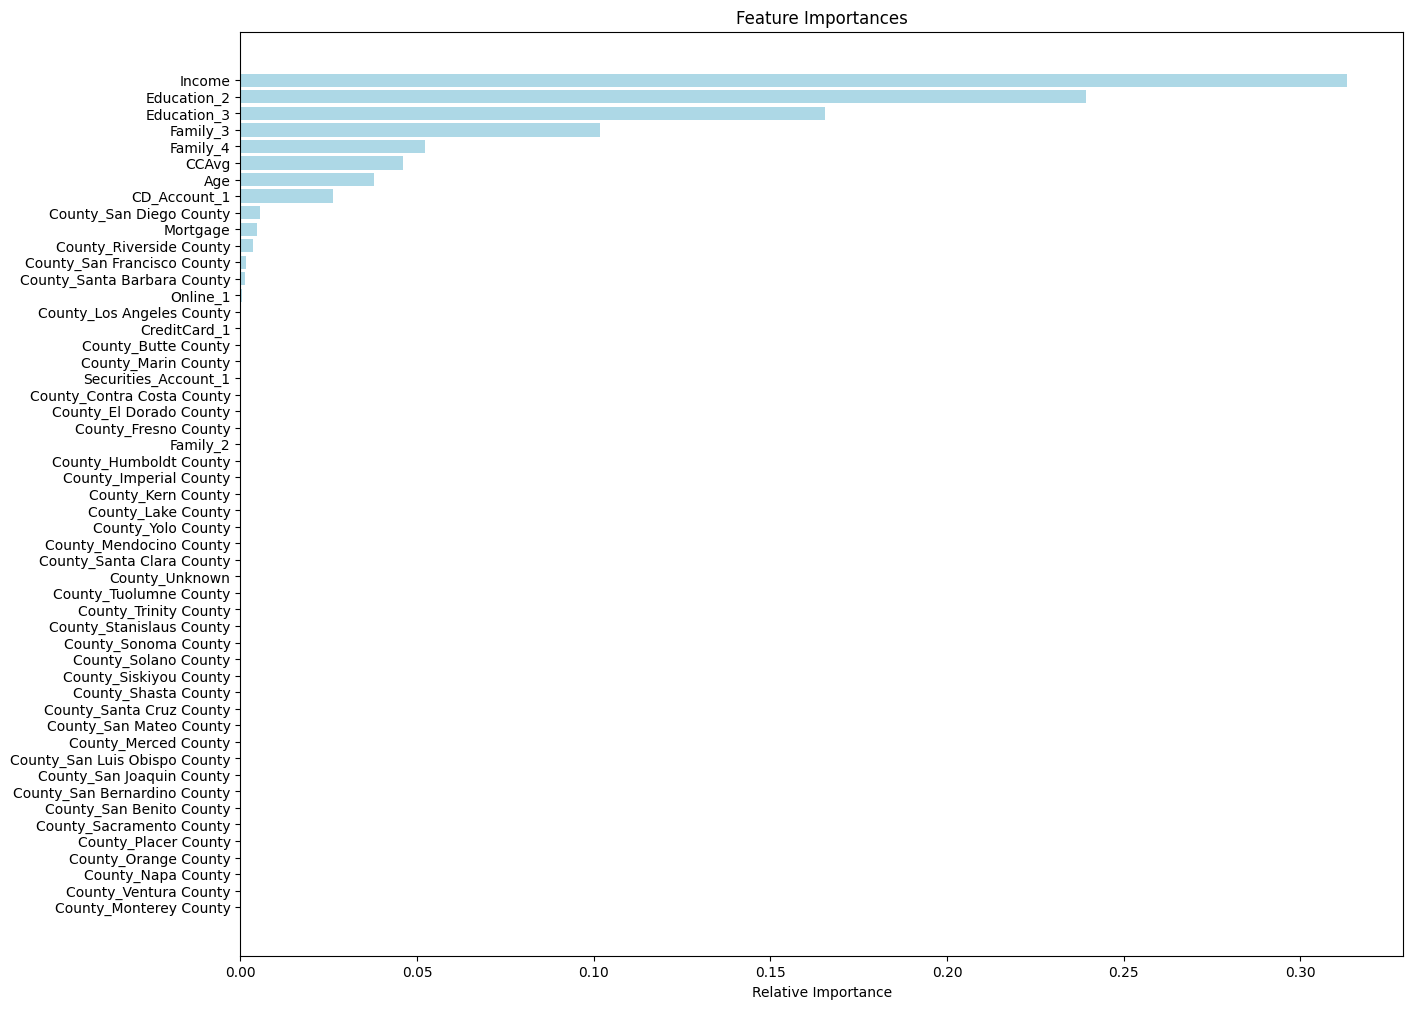

In [ ]:
# Visualizing feature importances using a horizontal bar chart
importances = model.feature_importances_
indices = np.argsort(importances)
feature_names = X_train.columns.to_list()

plt.figure(figsize=(15, 12))          # Create a new figure for the plot with a specified size
plt.title("Feature Importances")      # Set the title of the plot

# Create a horizontal bar chart with the feature importances
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")

# Set the labels for the y-axis (the feature names)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")       # Set the label for the x-axis
plt.show()

#### **Observation**: Based on the decision tree model, Income and Education emerges as the most important variable for predicting whether a customer will opt for a Personal Loan

## Model Performance Improvement

### Decision Tree (Pre-pruning)
**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### Build Decision Tree Model

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:.25,1:.75})

# Grid of Hyperparameters to choose from
parameters = {
    "max_depth": np.arange(3, 10),
    'criterion': ['gini','entropy'],
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, criterion='entropy',
                       max_depth=3, max_leaf_nodes=2, random_state=1)

In [ ]:
# Check parameters of the model best fit using GridSearchCV
pd.DataFrame(estimator.get_params(), index=["Decision Tree (Prepuned)"])

ccp_alpha  class_weight criterion  max_depth  \
Decision Tree (Prepuned)        0.0           NaN   entropy          3   

                         max_features  max_leaf_nodes  min_impurity_decrease  \
Decision Tree (Prepuned)         None               2                    0.0   

                          min_samples_leaf  min_samples_split  \
Decision Tree (Prepuned)                 1                  2   

                          min_weight_fraction_leaf  random_state splitter  
Decision Tree (Prepuned)                       0.0             1     best

#### Checking performance on Training Set

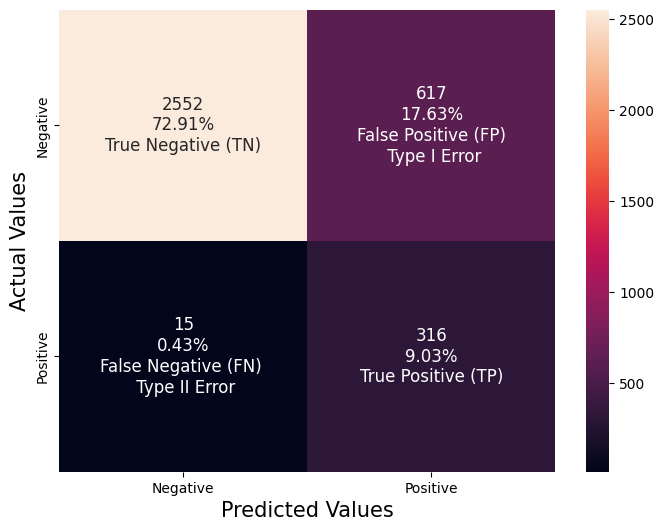

In [ ]:
# Evaluate the performance of the model on the training set using a confusion matrix
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train, "Decision Tree - Pre-Pruned : Training"
)

# Append the performance matrix of this Tree to another Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_tune_perf_train]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_tune_perf_train]
                                                       ).index.duplicated(keep='last')]
decision_tree_tune_perf_train

Accuracy    Recall  Precision  F1 Score
Decision Tree - Pre-Pruned : Training  0.819429  0.954683   0.338692       0.5

#### Checking performance on Testing Set

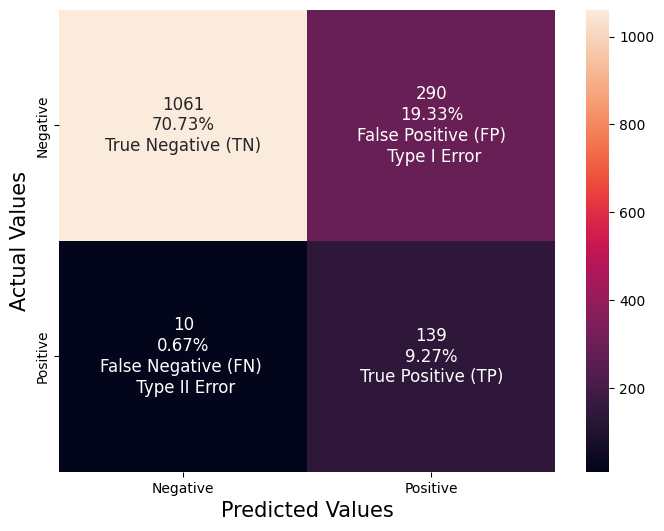

In [ ]:
## Evaluate the performance of the model on the testing set using a confusion matrix
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test, "Decision Tree - Pre-Pruned : Testing"
)

# Append the performance matrix of this Tree to another Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_tune_perf_test]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_tune_perf_test]
                                                       ).index.duplicated(keep='last')]
decision_tree_tune_perf_test

Accuracy    Recall  Precision  F1 Score
Decision Tree - Pre-Pruned : Testing       0.8  0.932886   0.324009  0.480969

In [ ]:
# Compare the performance parameter of both the initial and pre-pruned models
decision_tree_perf_matrix.sort_index()

Accuracy    Recall  Precision  F1 Score
Decision Tree - Full grown : Testing   0.978667  0.879195   0.903448  0.891156
Decision Tree - Full grown : Training  1.000000  1.000000   1.000000  1.000000
Decision Tree - Pre-Pruned : Testing   0.800000  0.932886   0.324009  0.480969
Decision Tree - Pre-Pruned : Training  0.819429  0.954683   0.338692  0.500000

#### **Observation**:
After pre-pruning a decision tree, the following changes are observed:

 - **Perfect Recall on training sets**: The Recall metric, which measures the proportion of true positives (correctly predicted instances) among all actual positive instances, reached 1, indicating zero False Negatives (Type II errors) on both training sets. This is expected, as pre-pruning reduces overfitting and ensures the model is more generalizable.
 - **Improved Recall on testing set**: The Recall metric increased on the testing set after pre-pruning, indicating better detection of true positives.
 - **Decreased Accuracy on both sets**: However, the Accuracy metric, which measures the proportion of correct predictions among all instances, decreased significantly on both the testing and training sets. This suggests an increase in False Positives (Type I errors), which outweighed the improvement in Recall.

#### Visualizing the Decision Tree

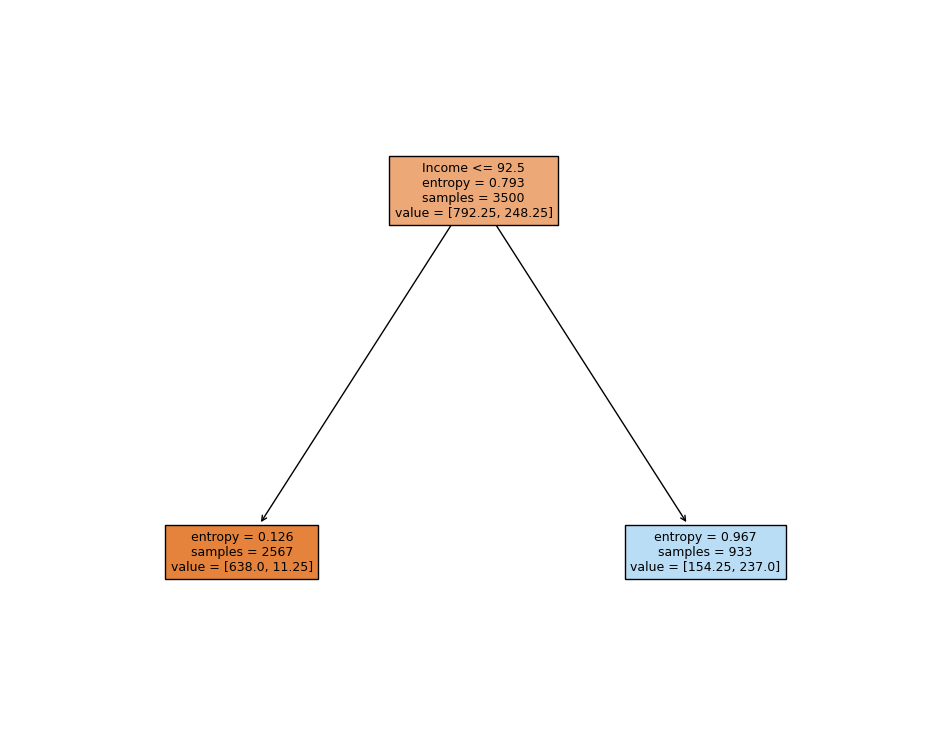

In [ ]:
# Display the Decision Tree by calling the Display_Decision_Tree() function defined earlier
Display_Decision_Tree(estimator, X_train, figsize=(10, 8))

#### Rules of the Decision Tree

In [ ]:
# Test report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names = feature_names, show_weights = True))

|--- Income <= 92.50
|   |--- weights: [638.00, 11.25] class: 0
|--- Income >  92.50
|   |--- weights: [154.25, 237.00] class: 1



#### **Observation**:
 - **Simplified tree**: Pre-pruning resulted in a more simplified decision tree, which is less complex and more generalizable to new data. This is a desired outcome, as it reduces overfitting and improves the model's ability to make predictions on unseen data.
 - **Importance of hyperparameters and pruning**: You've highlighted the crucial role of hyperparameters and pruning in the model selection process. By tuning hyperparameters and applying pruning techniques, you can effectively reduce overfitting and improve the model's performance. This is a vital aspect of machine learning, as it helps prevent models from becoming too specialized and ensures they can generalize well to new data.

#### Evaluate Gini importance

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                               Imp
Income                         1.0
County_Napa County             0.0
County_Orange County           0.0
County_Placer County           0.0
County_Riverside County        0.0
County_Sacramento County       0.0
County_San Benito County       0.0
County_San Bernardino County   0.0
County_San Diego County        0.0
County_San Francisco County    0.0
County_San Joaquin County      0.0
County_San Luis Obispo County  0.0
County_San Mateo County        0.0
Age                            0.0
County_Santa Clara County      0.0
County_Santa Cruz County       0.0
County_Shasta County           0.0
County_Siskiyou County         0.0
County_Solano County           0.0
County_Sonoma County           0.0
County_Stanislaus County       0.0
County_Trinity County          0.0
County_Tuolumne County         0.0
County_Unknown                 0.0
County_Ventura County          0.0
County_Santa Barbara County    0.0
County_Monterey County         0.0
County_Merced County

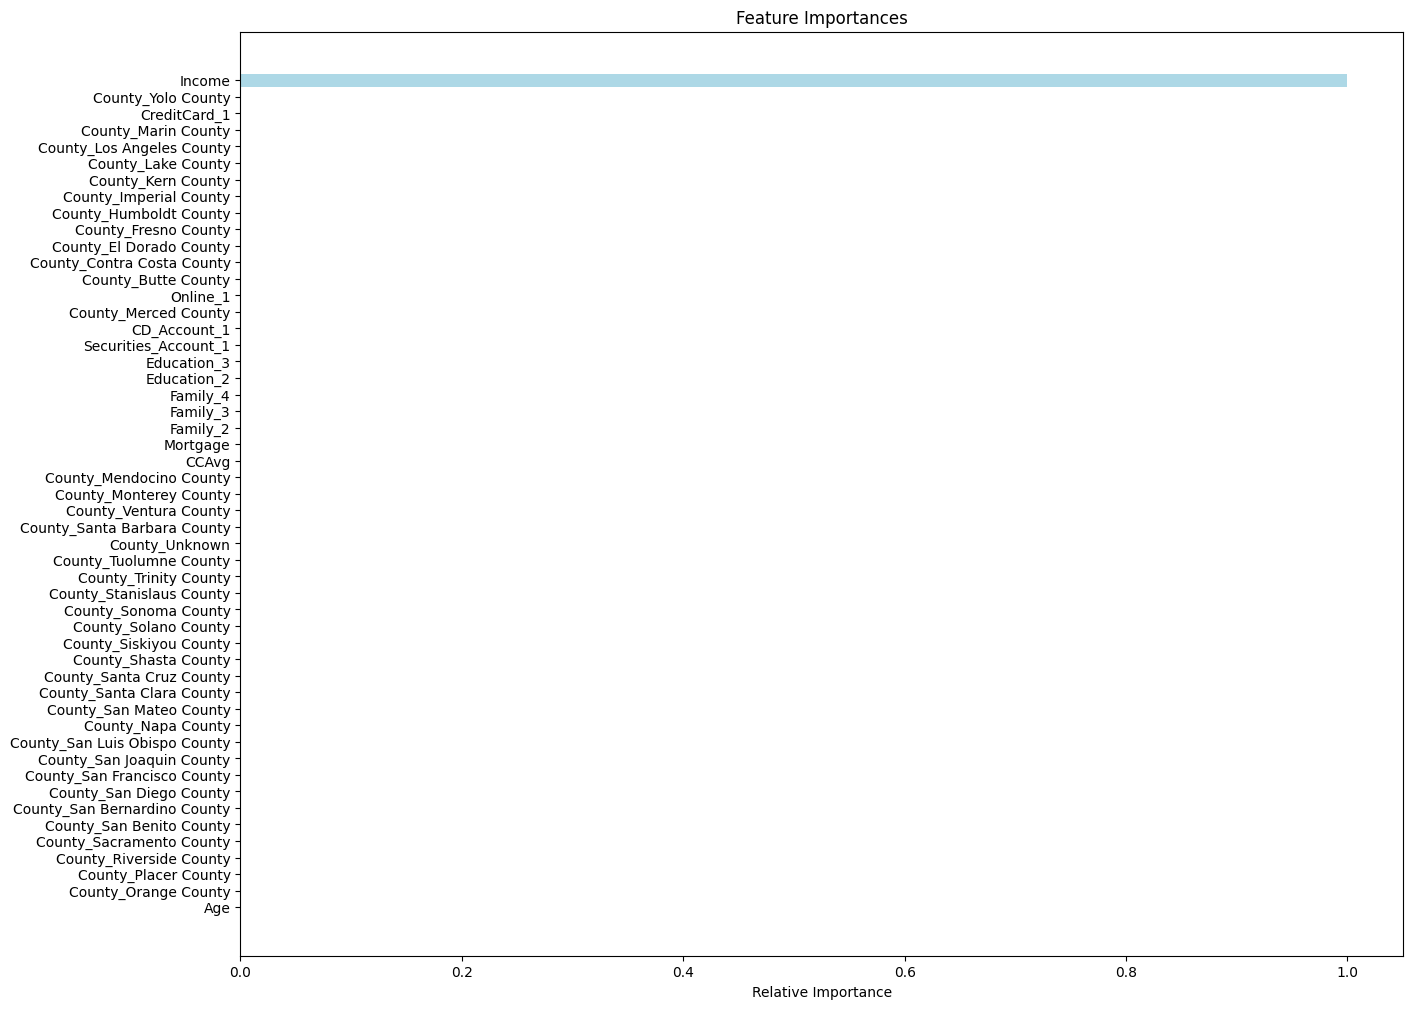

In [ ]:
# Visualizing feature importances using a horizontal bar chart
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 12))          # Create a new figure for the plot with a specified size
plt.title("Feature Importances")      # Set the title of the plot

# Create a horizontal bar chart with the feature importances
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")

# Set the labels for the y-axis (the feature names)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")       # Set the label for the x-axis
plt.show()                              # Display the plot

#### **Observation**:
 - Even after pre-tuning the decision tree, Income remains the most important feature, indicating its significant impact on the model's predictions.
 - The pre-tuned tree is simpler, resulting in fewer dependent variables (features) being considered important. This is expected, as pre-tuning reduces the complexity of the tree, leading to a more generalizable model.

### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively identifies the node with the "weakest link." This is determined by an effective alpha, where nodes with the smallest effective alpha are pruned first. To determine suitable values for ``ccp_alpha``, scikit-learn offers `DecisionTreeClassifier.cost_complexity_pruning_path`, providing effective alphas and the corresponding total leaf impurities at each pruning step. As alpha increases, more of the tree is pruned, resulting in higher total impurity of its leaves.

#### Build Decision Tree Model

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})     # Creates a Decision Tree Classifier object with a fixed random state
path = clf.cost_complexity_pruning_path(X_train, y_train)                         # Calculates the cost complexity pruning path using X_train and y_train
ccp_alphas, impurities = path.ccp_alphas, path.impurities                         # Extracts pruning alphas and impurities from the CostComplexityPruningPath object

In [ ]:
# Print the impurities of Effective Alpha
print(f"Impurities of Effective Alpha:\n")
pd.DataFrame(path)

Impurities of Effective Alpha:



ccp_alphas    impurities
0   0.000000e+00 -5.849087e-15
1   1.320471e-19 -5.848955e-15
2   1.320471e-19 -5.848823e-15
3   7.482671e-19 -5.848074e-15
4   1.760629e-18 -5.846314e-15
5   2.332833e-18 -5.843981e-15
6   2.494224e-18 -5.841487e-15
7   2.905037e-18 -5.838582e-15
8   4.555626e-18 -5.834026e-15
9   4.665666e-18 -5.829360e-15
10  4.665666e-18 -5.824695e-15
11  5.832082e-18 -5.818863e-15
12  5.854090e-18 -5.813009e-15
13  6.822436e-18 -5.806186e-15
14  9.478050e-18 -5.796708e-15
15  1.003558e-17 -5.786673e-15
16  8.081285e-17 -5.705860e-15
17  1.143528e-16 -5.591507e-15
18  1.279537e-16 -5.463553e-15
19  3.369896e-04  3.369896e-04
20  3.643130e-04  1.429929e-03
21  3.643130e-04  1.794242e-03
22  3.643130e-04  2.522868e-03
23  3.685823e-04  3.628615e-03
24  3.744328e-04  4.003048e-03
25  3.793881e-04  5.141212e-03
26  3.879017e-04  5.529113e-03
27  3.905508e-04  6.700766e-03
28  3.928099e-04  7.093576e-03
29  5.804848e-04  8.835030e-03
30  5.860688e-04  9.421099e-03
31  5.860688e-04  1.000717e-02
32  5.981592e-04  1.180165e-02
33  6.546462e-04  1.245629e-02
34  7.021026e-04  1.386050e-02
35  8.789656e-04  1.473946e-02
36  9.404360e-04  1.567990e-02
37  9.407728e-04  1.756144e-02
38  1.011155e-03  1.857260e-02
39  1.013173e-03  1.958577e-02
40  1.018946e-03  2.060472e-02
41  1.030992e-03  2.163571e-02
42  1.151207e-03  2.278692e-02
43  1.157338e-03  2.394425e-02
44  1.331286e-03  2.527554e-02
45  1.399934e-03  2.667547e-02
46  1.512006e-03  2.818748e-02
47  1.612806e-03  2.980029e-02
48  1.638043e-03  3.143833e-02
49  2.602631e-03  3.404096e-02
50  2.742431e-03  3.678339e-02
51  3.335999e-03  4.011939e-02
52  3.409906e-03  4.352930e-02
53  3.527226e-03  4.705652e-02
54  4.797122e-03  5.665076e-02
55  5.138280e-03  6.178904e-02
56  6.725814e-03  6.851486e-02
57  2.253222e-02  9.104708e-02
58  3.057320e-02  2.133399e-01
59  2.537957e-01  4.671356e-01

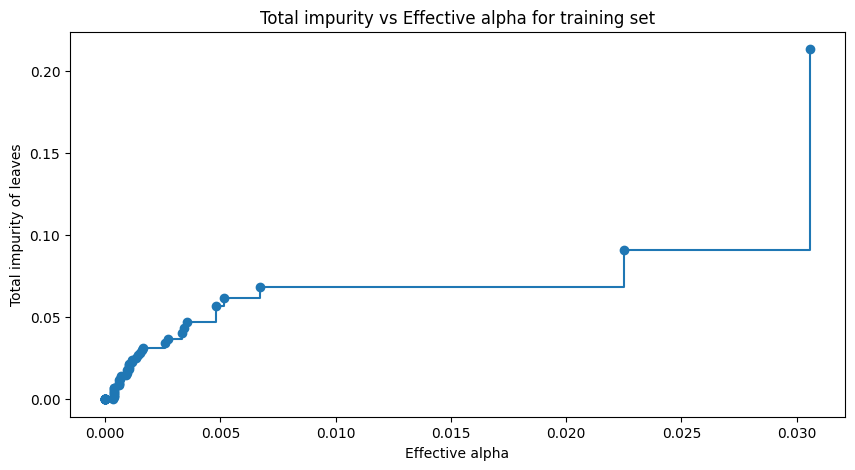

In [ ]:
# Plot Total Impurity against alpha for the training set
# This plot helps visualize the impact of pruning on the decision tree's complexity
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurity against the effective alpha values
# The 'steps-post' drawstyle ensures the plot steps at each alpha value
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Label the x-axis as 'Effective alpha' for clarity
ax.set_xlabel("Effective alpha")

# Label the y-axis as 'Total impurity of leaves' to indicate the metric being plotted
ax.set_ylabel("Total impurity of leaves")

# Set the title to clearly indicate the plot's purpose
ax.set_title("Total impurity vs Effective alpha for training set")

plt.show()            # Display the plot

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
# Training the decision tree using the effective alphas
# This loop trains a decision tree for each effective alpha value
clfs = []

for ccp_alpha in ccp_alphas:
    # Create a Decision Tree Classifier with the current effective alpha
    # Set random_state for reproducibility and class_weight to address class imbalance
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )

    # Train the decision tree on the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree (with the highest effective alpha)
# This indicates the level of pruning achieved
print(
    "Number of nodes in the last tree is : {} with ccp_alpha : {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is : 1 with ccp_alpha : 0.25379571489480995


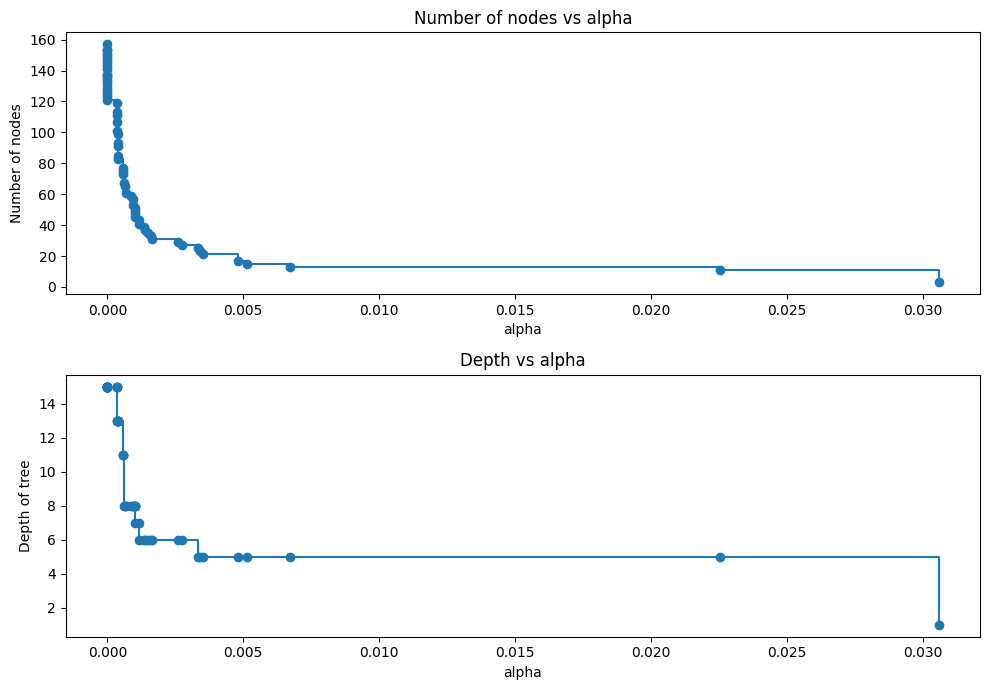

In [ ]:
# Remove the last element from the list of classifiers and effective alphas
# This is done to align the lists with the plots (since the last tree has no pruning)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes and depth from each decision tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure with two subplots for plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes against effective alpha in the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# Plot the depth of the tree against effective alpha in the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs alpha")

# Adjust the layout to ensure the plots fit nicely
fig.tight_layout()

##### **Recall vs alpha for training and testing sets**

In [ ]:
# Initialize an empty list to store the recall scores for the training set
recall_train = []

# Loop through each decision tree classifier in the list
for clf in clfs:
    # Predict the classes for the training set using the current classifier
    pred_train = clf.predict(X_train)

    # Calculate the recall score for the training set using the predicted classes
    values_train = recall_score(y_train, pred_train)

    # Append the recall score to the list
    recall_train.append(values_train)

In [ ]:
# Initialize an empty list to store the recall scores for the testing set
recall_test = []

# Loop through each decision tree classifier in the list
for clf in clfs:
    # Predict the classes for the testing set using the current classifier
    pred_test = clf.predict(X_test)

    # Calculate the recall score for the testing set using the predicted classes
    # This metric evaluates the classifier's performance on the testing set
    values_test = recall_score(y_test, pred_test)

    # Append the recall score to the list
    # This list will store the recall scores for each classifier in the list
    recall_test.append(values_test)

In [ ]:
# Calculate the training accuracy scores for each decision tree classifier
# This list comprehension loops through each classifier and calculates its accuracy on the training set
train_scores = [clf.score(X_train, y_train) for clf in clfs]

# Calculate the testing accuracy scores for each decision tree classifier
# This list comprehension loops through each classifier and calculates its accuracy on the testing set
test_scores = [clf.score(X_test, y_test) for clf in clfs]

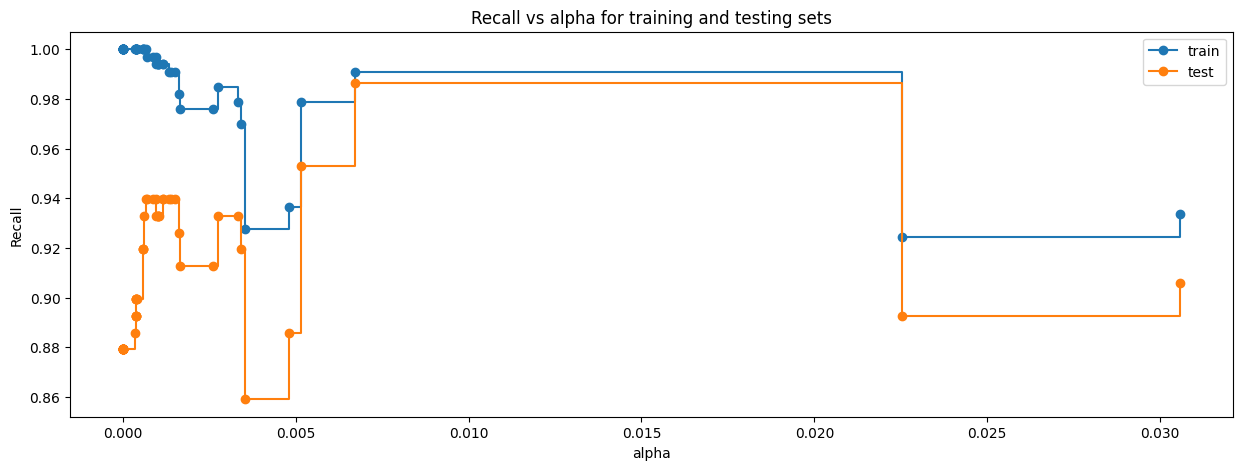

In [ ]:
# Compare the Recall vs alpha for training and testing sets on a plot
# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(15, 5))

ax.set_xlabel("alpha")    # Set the label for the x-axis (alpha values)
ax.set_ylabel("Recall")   # Set the label for the y-axis (Recall scores)

# Set the title for the plot
ax.set_title("Recall vs alpha for training and testing sets")

# Plot the Recall scores for the training set against the alpha values
# Use 'steps-post' drawstyle to connect the points with horizontal lines
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")

# Plot the Recall scores for the testing set against the alpha values
# Use 'steps-post' drawstyle to connect the points with horizontal lines
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")

ax.legend()   # Add a legend to the plot
plt.show()    # Display the plot

**Observation**: Analysis of the plot reveals that the maximum recall value is attained when the alpha value falls within the range of 0.005 to 0.01, for both the training and testing sets. This suggests that the optimal pruning level, as determined by the alpha value, lies within this specific range, resulting in the highest recall score.

In [ ]:
# # Creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006725813690406552,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [ ]:
# Train the best model (Decision Tree Classifier with optimal alpha) on the training set
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006725813690406552,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Checking performance on Training Set

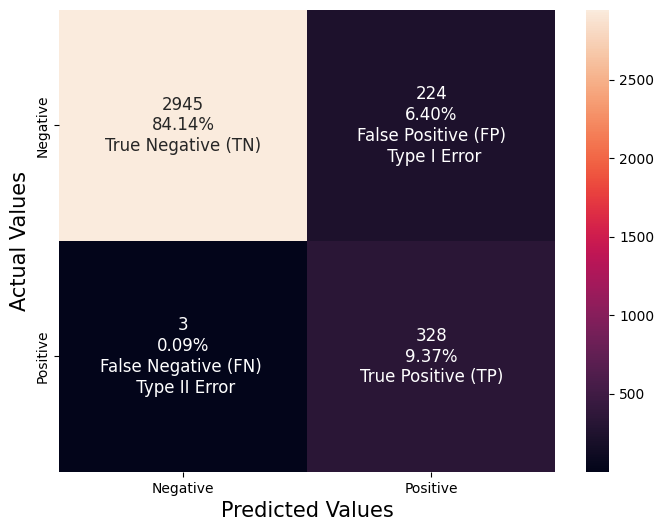

In [ ]:
# Compute the confusion matrix for the best model on the training set
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(
    best_model, X_train, y_train, "Decision Tree - Post-Pruned : Training"
)

# Append the performance matrix of this Tree to another Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_tune_post_train]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_tune_post_train]
                                                       ).index.duplicated(keep='last')]
decision_tree_tune_post_train

Accuracy    Recall  Precision  \
Decision Tree - Post-Pruned : Training  0.935143  0.990937   0.594203   

                                        F1 Score  
Decision Tree - Post-Pruned : Training  0.742922

#### Checking performance on Testing Set

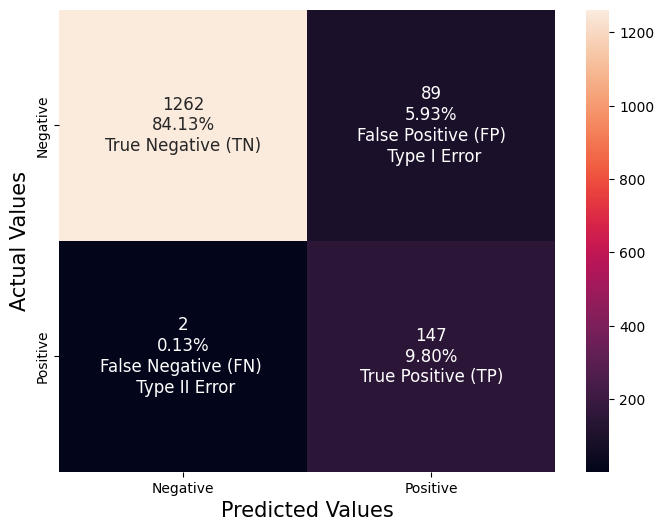

In [ ]:
# Compute the confusion matrix for the best model on the testing set
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test, "Decision Tree - Post-Pruned : Testing"
)

# Append the performance matrix of this Tree to another Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_tune_post_test]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_tune_post_test]
                                                       ).index.duplicated(keep='last')]
decision_tree_tune_post_test

Accuracy    Recall  Precision  F1 Score
Decision Tree - Post-Pruned : Testing  0.939333  0.986577   0.622881  0.763636

In [ ]:
# Compare the performance parameter of both the initial and pre-pruned models
decision_tree_perf_matrix.sort_index()

Accuracy    Recall  Precision  \
Decision Tree - Full grown : Testing    0.978667  0.879195   0.903448   
Decision Tree - Full grown : Training   1.000000  1.000000   1.000000   
Decision Tree - Post-Pruned : Testing   0.939333  0.986577   0.622881   
Decision Tree - Post-Pruned : Training  0.935143  0.990937   0.594203   
Decision Tree - Pre-Pruned : Testing    0.800000  0.932886   0.324009   
Decision Tree - Pre-Pruned : Training   0.819429  0.954683   0.338692   

                                        F1 Score  
Decision Tree - Full grown : Testing    0.891156  
Decision Tree - Full grown : Training   1.000000  
Decision Tree - Post-Pruned : Testing   0.763636  
Decision Tree - Post-Pruned : Training  0.742922  
Decision Tree - Pre-Pruned : Testing    0.480969  
Decision Tree - Pre-Pruned : Training   0.500000

#### Visualizing the Decision Tree

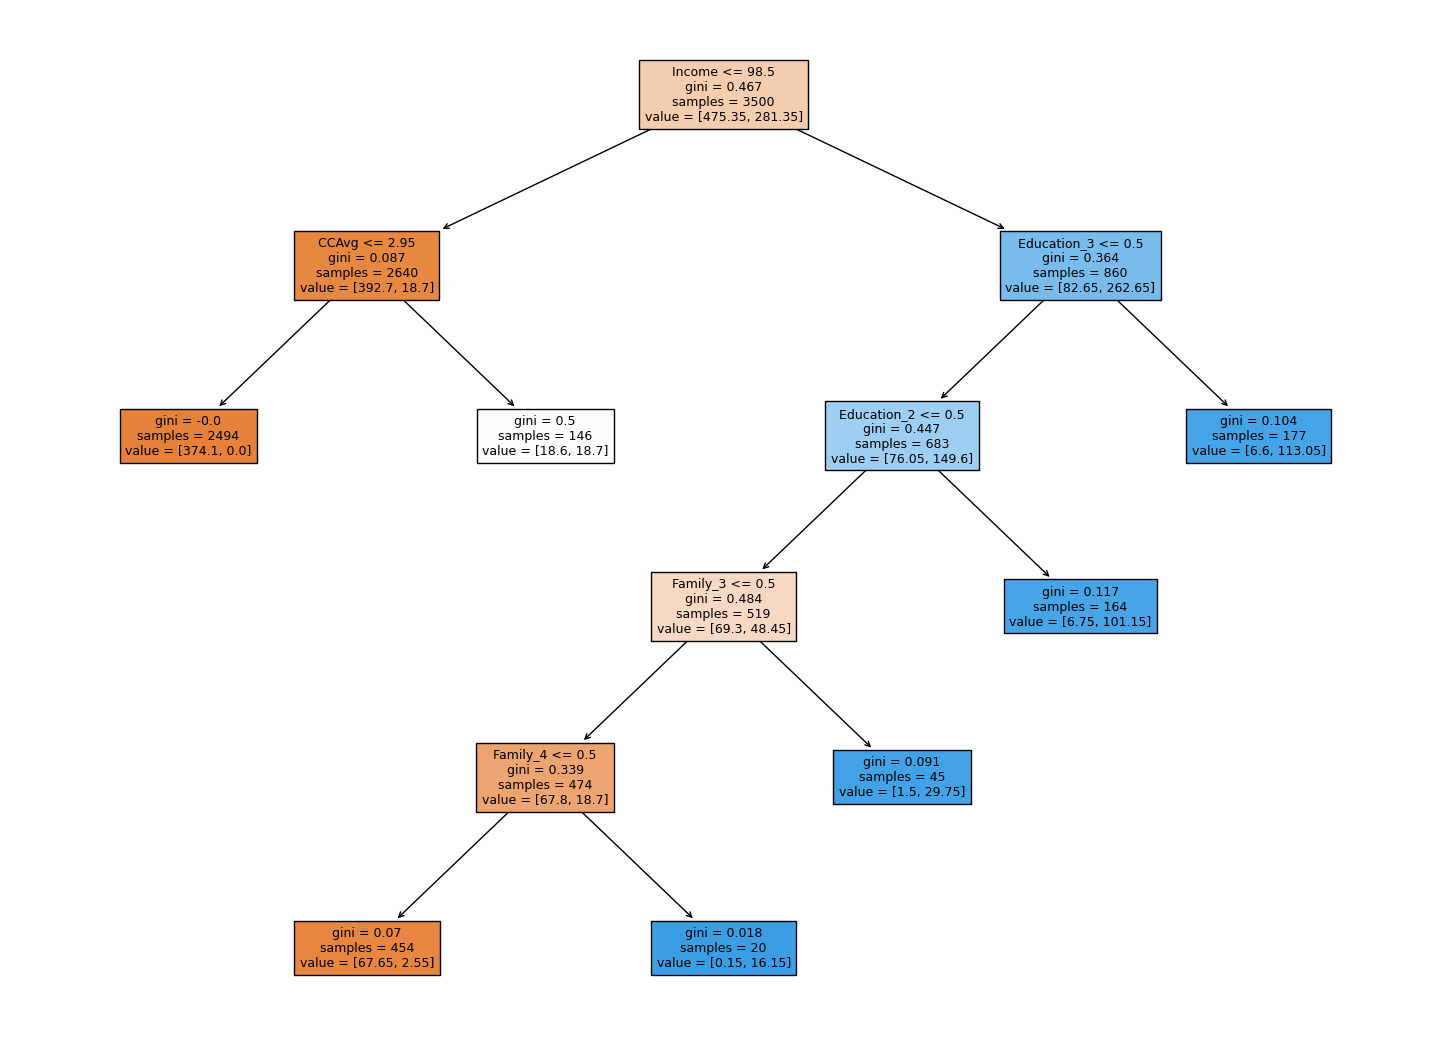

In [ ]:
# Display the Decision Tree by calling the Display_Decision_Tree() function defined earlier
Display_Decision_Tree(best_model, X_train, figsize=(15, 11))

#### Rules of the Decision Tree

In [ ]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



#### Evaluate Gini importance

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.636685
Education_2                    0.103283
Family_3                       0.082412
Family_4                       0.079906
CCAvg                          0.056525
Education_3                    0.041189
Age                            0.000000
County_Santa Clara County      0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Siskiyou County         0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Riverside County        0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_Trinity County          0.000000


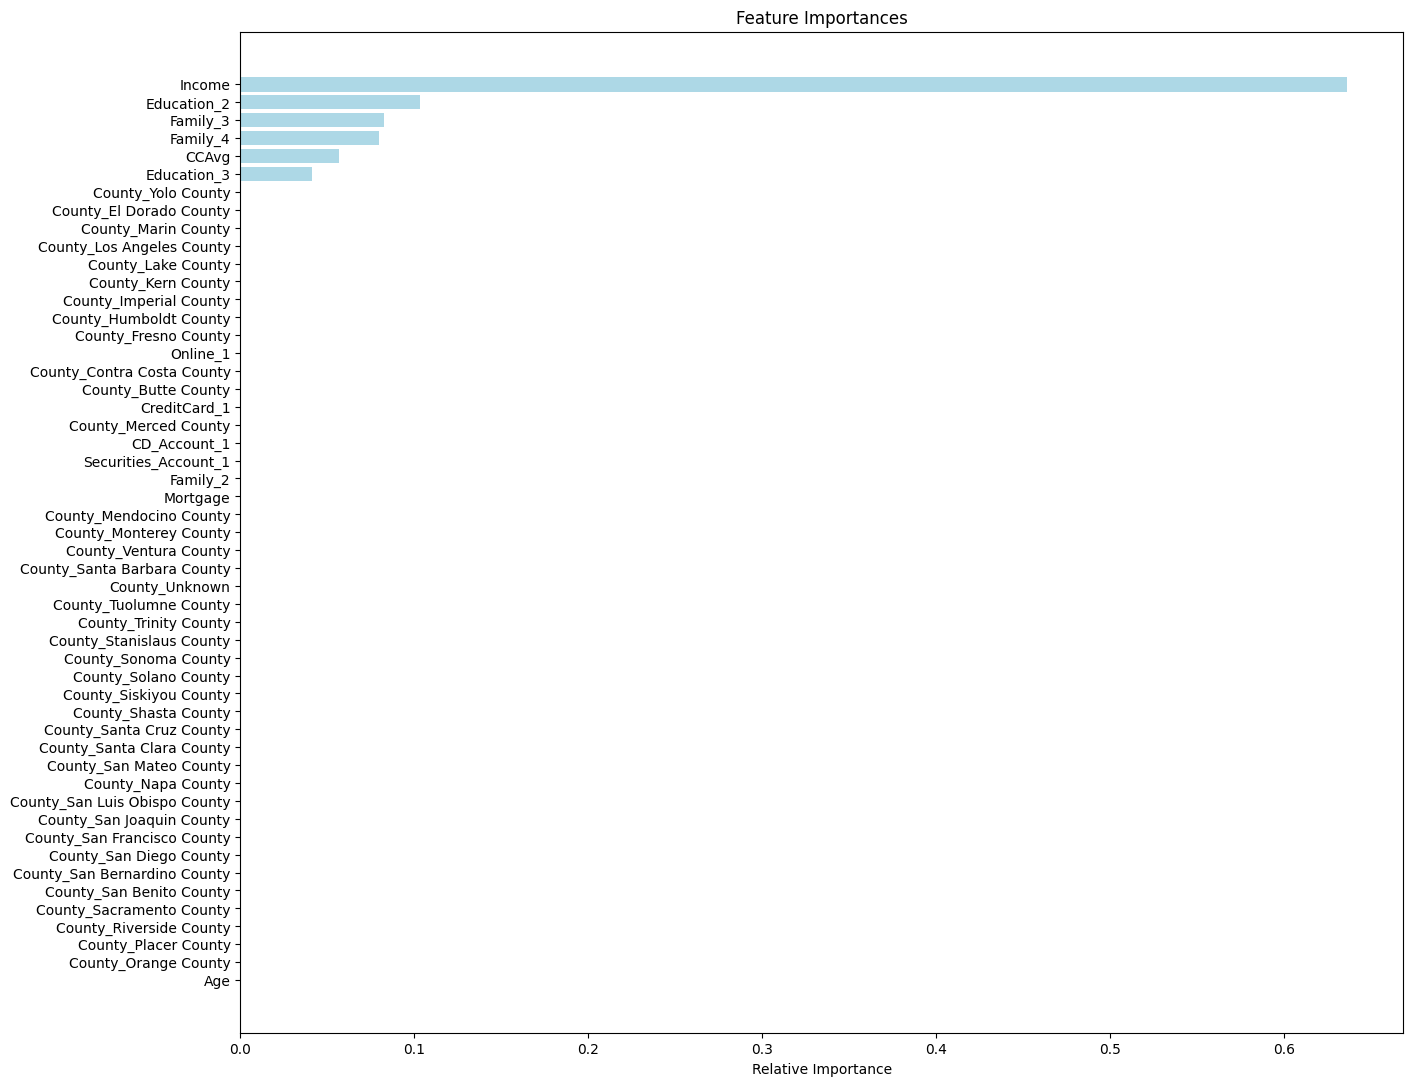

In [ ]:
# Visualize the feature importances of the best model
# Get the feature importances from the best model
importances = best_model.feature_importances_
# Sort the feature indices by importance
indices = np.argsort(importances)

# Create a bar plot to display the feature importances
plt.figure(figsize=(15, 13))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### **Observation**:
 - In the post tuned decision tree also, Income is the most important features followed by Education

## Model Comparison and Final Model Selection

In [ ]:
# Training performance comparison
# search for rows in the pre-built DataFrame decision_tree_perf_matrix where the index contains the word "Train"
decision_tree_perf_matrix.loc[decision_tree_perf_matrix.index.str.contains("Train")]

Accuracy    Recall  Precision  \
Decision Tree - Full grown : Training   1.000000  1.000000   1.000000   
Decision Tree - Pre-Pruned : Training   0.819429  0.954683   0.338692   
Decision Tree - Post-Pruned : Training  0.935143  0.990937   0.594203   

                                        F1 Score  
Decision Tree - Full grown : Training   1.000000  
Decision Tree - Pre-Pruned : Training   0.500000  
Decision Tree - Post-Pruned : Training  0.742922

In [ ]:
# Testing performance comparison
# search for rows in the pre-built DataFrame decision_tree_perf_matrix where the index contains the word "Test"
decision_tree_perf_matrix.loc[decision_tree_perf_matrix.index.str.contains("Test")]

Accuracy    Recall  Precision  F1 Score
Decision Tree - Full grown : Testing   0.978667  0.879195   0.903448  0.891156
Decision Tree - Pre-Pruned : Testing   0.800000  0.932886   0.324009  0.480969
Decision Tree - Post-Pruned : Testing  0.939333  0.986577   0.622881  0.763636

## **Conclusion**:

  - The decision tree model achieved its highest recall score on the training data, while post-pruning yielded the best recall score on the test set. Notably, the post-pruned tree maintained simplicity and ease of interpretation, a crucial aspect for our model. Precision followed a consistent trend across both training and test sets, with the initial tree performing highest, followed by the post-pruned tree, and then the pre-pruned tree.
  - In line with the model evaluation criteria focused on reducing Type II errors, the decision to post-prune the tree resulted in optimal recall but also led to a decrease in accuracy. This trade-off underscores the importance for AllLife Bank to expand its loan business, where every customer who borrows a personal loan is crucial. Therefore, minimizing mistakes in the second prediction (i.e., false negatives) is of utmost importance.
  - **In conclusion, the post-pruned decision tree model emerges as the top performer, achieving the highest recall scores while preventing overfitting and improving generalizability. Its high interpretability and suitability for our requirements make it the ideal choice for our model.**

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___

Recommendations for the Marketing Team:
1. **Target High-Value Education Segments**: Focus on customers with advanced or professional education levels, as they are more likely to borrow personal loans.
2. **Identify High-Income and High-Spending Customers**: Target high-income customers and those with higher credit card spending, as they have a steady cash flow and lower repayment risk.
3. **Consider Credit Spending Habits**: Customers with high average credit card spending may be potential targets, but exercise caution due to the higher default risk.
4. **Family Size Matters**: Customers with larger families (three or more members) are more likely to borrow personal loans, making them a key target segment.
5. **Mortgage Holders with High Repayments**: Customers with mortgages exceeding $100,000 USD may need personal loans to manage high repayment installments, making them a prime target audience.
6. **Low-Risk Customers with CD and Security Accounts**: Target customers with CD accounts and security accounts, as they pose less risk and their deposits can serve as collateral for personal loans if needed.